# 1. Loading Data and Early Explorations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from helpers import feature_importance, pearson_correlation, plot_data, trendline, transform_2D, seed_everything, set_axis_style
from calculate import ml_predict, val_score

In [2]:
# Seed all parameters to ensure repeatability
seed_everything()

In [3]:
# Read in our data file
df = pd.read_csv('C-C Coupling Training.csv')

In [4]:
df

,Adsorbate 1,Adsorbate 2,num of NM atoms 1,num of NM atoms 2,num of H 1,num of H 2,Atomic num 1,Atomic num 2,PE 1,PE 2,...,IE 1 add IE 2,Average EA of Adsorbates squared,Average PE of Adsorbates squared,Average Covalent Radius of Adosrbates squared,Average FIE of Adsorbates squared,Average VdW Radius squared,Average Atomic num of Adsorbates squared,Average num of Valence Electron squared,Average IE squared,G_C2O2 - Gco
0,O,O,1.0,1.0,0.0,0.0,8.0,8.00,3.44,3.44,...,27.24,2.13,11.83,0.40,185.45,2.31,64.00,36.00,185.50,-0.01526
1,O,OH,1.0,2.0,0.0,1.0,8.0,4.50,3.44,2.82,...,26.64,1.65,9.80,0.31,185.31,2.07,39.06,42.25,177.42,0.06446
2,O,Cl,1.0,1.0,0.0,0.0,8.0,17.00,3.44,3.16,...,26.59,6.43,10.89,0.66,176.69,2.67,156.25,42.25,176.76,0.14972
3,OH,O,2.0,1.0,1.0,0.0,4.5,8.00,2.82,3.44,...,26.64,1.65,9.80,0.31,185.31,2.07,39.06,42.25,177.42,0.06446
4,OH,OH,2.0,2.0,1.0,1.0,4.5,4.50,2.82,2.82,...,26.04,1.23,7.95,0.23,185.18,1.85,20.25,49.00,169.52,0.20088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Cl,Br,1.0,1.0,0.0,0.0,17.0,35.00,3.16,2.96,...,24.78,12.16,9.36,1.13,153.52,3.24,676.00,49.00,153.51,0.25629
60,Br,CH,1.0,2.0,0.0,1.0,35.0,3.50,2.96,2.38,...,22.45,4.78,7.12,0.71,146.93,2.72,370.56,36.00,126.00,0.10082
61,Br,CH2,1.0,3.0,0.0,2.0,35.0,2.67,2.96,2.32,...,22.21,4.59,6.96,0.64,151.69,2.59,354.69,42.25,123.32,0.10921
62,Br,SH,1.0,2.0,0.0,1.0,35.0,8.50,2.96,2.39,...,22.23,5.71,7.16,0.83,141.53,2.81,473.06,49.00,123.54,0.25777


In [5]:
df.shape

(64, 55)

In [6]:
adsorbates = df[['Adsorbate 1', 'Adsorbate 2']]

In [7]:
adsorbates

,Adsorbate 1,Adsorbate 2
0,O,O
1,O,OH
2,O,Cl
3,OH,O
4,OH,OH
...,...,...
59,Cl,Br
60,Br,CH
61,Br,CH2
62,Br,SH


In [8]:
# Drop adsorbates 1 and 2 from our feature space as they will not participate in training
df = df.drop(columns = ['Adsorbate 1', 'Adsorbate 2'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 53 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   num of NM atoms 1                              64 non-null     float64
 1   num of NM atoms 2                              64 non-null     float64
 2   num of H 1                                     64 non-null     float64
 3   num of H 2                                     64 non-null     float64
 4   Atomic num 1                                   64 non-null     float64
 5   Atomic num 2                                   64 non-null     float64
 6   PE 1                                           64 non-null     float64
 7   PE 2                                           64 non-null     float64
 8   Covalent Radius 1                              64 non-null     float64
 9   Covalent Radius 2                              64 non-nu

<b> No missing data observed in training dataset </b>

In [10]:
df.describe()

,num of NM atoms 1,num of NM atoms 2,num of H 1,num of H 2,Atomic num 1,Atomic num 2,PE 1,PE 2,Covalent Radius 1,Covalent Radius 2,...,IE 1 add IE 2,Average EA of Adsorbates squared,Average PE of Adsorbates squared,Average Covalent Radius of Adosrbates squared,Average FIE of Adsorbates squared,Average VdW Radius squared,Average Atomic num of Adsorbates squared,Average num of Valence Electron squared,Average IE squared,G_C2O2 - Gco
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.00000,64.000000,64.000000
mean,1.937500,1.937500,0.937500,0.937500,8.429844,8.429844,2.735938,2.735938,0.650625,0.650625,...,23.905000,2.784531,7.579375,0.445156,172.609844,2.266875,102.550469,41.71875,144.570000,0.081561
std,0.973865,0.973865,0.973865,0.973865,8.020709,8.020709,0.478578,0.478578,0.211884,0.211884,...,2.634792,2.624086,1.805659,0.213653,28.835132,0.360079,151.817110,8.77242,32.550804,0.097467
min,1.000000,1.000000,0.000000,0.000000,2.250000,2.250000,2.290000,2.290000,0.420000,0.420000,...,20.200000,0.160000,5.390000,0.200000,124.760000,1.750000,9.770000,20.25000,102.010000,-0.130060
25%,1.000000,1.000000,0.000000,0.000000,3.500000,3.500000,2.380000,2.380000,0.480000,0.480000,...,21.862500,0.962500,6.225000,0.290000,153.062500,2.000000,20.250000,36.00000,119.515000,0.030540
50%,2.000000,2.000000,1.000000,1.000000,6.000000,6.000000,2.565000,2.565000,0.595000,0.595000,...,23.530000,1.630000,7.030000,0.360000,163.785000,2.180000,39.060000,42.25000,138.415000,0.092860
75%,2.250000,2.250000,1.250000,1.250000,8.625000,8.625000,2.960000,2.960000,0.710000,0.710000,...,25.852500,4.800000,9.360000,0.560000,186.147500,2.567500,93.952500,49.00000,167.090000,0.143510
max,4.000000,4.000000,3.000000,3.000000,35.000000,35.000000,3.980000,3.980000,1.140000,1.140000,...,30.440000,12.160000,11.830000,1.130000,240.720000,3.240000,676.000000,56.25000,231.650000,0.257770


# 2. Normalizing and Creating Dummy Variables

In [11]:
# print the features names for ease of use later
df.columns

Index(['num of NM atoms 1', 'num of NM atoms 2', 'num of H 1', 'num of H 2',
       'Atomic num 1', 'Atomic num 2', 'PE 1', 'PE 2', 'Covalent Radius 1',
       'Covalent Radius 2', 'FIE 1', 'FIE 2', 'IE 1', 'IE 2', 'EA 1', 'EA 2',
       'VdW Radius 1', 'VdW Radius 2', 'num of Valence Electron 1',
       'num of Valence Electron 2', 'num of Atoms', 'num of H',
       'Average Atomic num', 'Average PE', 'Average Covalent Radius',
       'Average FIE', 'Average IE', 'Average EA', 'Average VdW Radius',
       'Average num of Valence Electron', 'PE 1 minus PE 2', 'PE 1 add PE 2',
       'Covalent Radius 1 minus Covalent Radius 2',
       'Covalent Radius 1 add Covalent Radius 2',
       'VdW Radius 1 minus VdW Radius 2', 'VdW Radius 1 add VdW Radius 2',
       'FIE 1 minus FIE 2', 'FIE 1 add FIE 2', 'EA 1 minus EA 2',
       'EA 1 add EA 2', 'num of Valence 1 minus num of Valence 2',
       'num of Valence 1 add num of Valence 2', 'IE 1 minus IE 2',
       'IE 1 add IE 2', 'Average EA of A

In [12]:
from sklearn.preprocessing import MinMaxScaler

# instantiate scaler method
scaler = MinMaxScaler()

# identify all numerical features to be normalized
numerical = ['num of NM atoms 1', 'num of NM atoms 2', 'num of H 1', 'num of H 2',
       'Average Atomic num 1', 'Average Atomic num 2', 'Average PE 1',
       'Average PE 2', 'Average Covalent Radius 1',
       'Average Covalent Radius 2', 'Average FIE 1', 'Average FIE 2', 'IE 1',
       'IE 2', 'Average EA 1', 'Average EA 2', 'Average VdW Radius 1',
       'Average VdW Radius 2', 'num of Valence Electron 1',
       'num of Valence Electron 2', 'num of Atoms', 'num of H', 'Atomic num',
       'PE', 'Covalent Radius', 'FIE', 'IE', 'EA', 'VdW Radius',
       'Average num of Valence Electron', 'PE 1 minus PE 2', 'PE 1 add PE 2',
       'Covalent Radius 1 minus Covalent Radius 2',
       'Covalent Radius 1 add Covalent Radius 2',
       'VdW Radius 1 minus Avg VdW Radius 2',
       'VdW Radius 1 add Avg VdW Radius 2', 'FIE 1 minus FIE 2',
       'FIE 1 add FIE 2', 'EA 1 minus EA 2', 'EA 1 add EA 2',
       'num of Valence 1 minus num of Valence 2',
       'num of Valence 1 add num of Valence 2', 'IE 1 minus IE 2',
       'IE 1 add IE 2', 'Averaged EA of Adsorbates squared',
       'Averaged PE of Adsorbates squared',
       'Average Covalent Radius of Adosrbates squared',
       'Averaged FIE of Adsorbates squared', 'Averaged VdW Radius squared',
       'Averaged Atomic num of Adsorbates squared',
       'Averaged num of Valence Electron squared', 'Averaged IE squared']

In [13]:
# scale the features
#df[numerical] = scaler.fit_transform(df[numerical])

In [14]:
#categorical = pd.get_dummies(df[['Adsorbate 1', 'Adsorbate 2']])
#final_df = pd.merge(categorical, df, how='right', left_index=True, right_index=True)
#final_df = final_df.drop(columns=['Adsorbate 1', 'Adsorbate 2'])

In [15]:
final_df = df

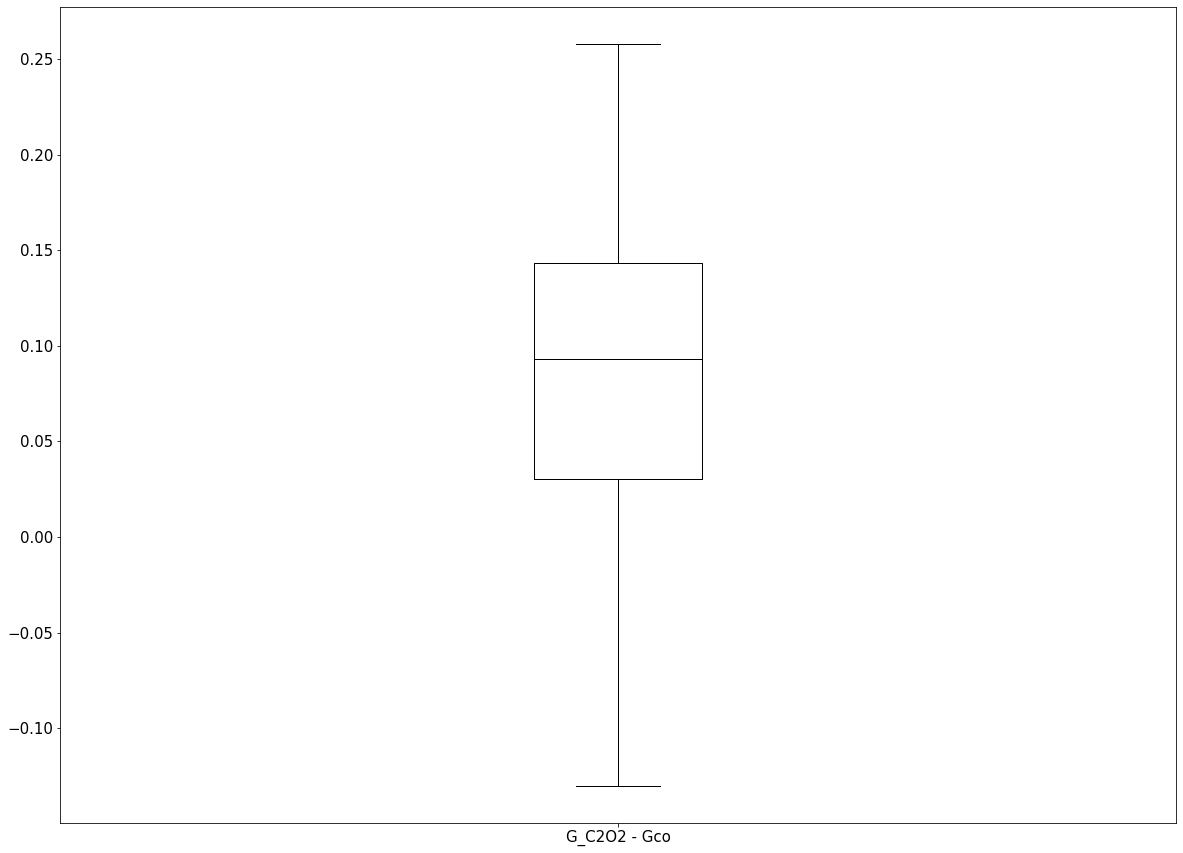

In [104]:
final_df.boxplot(color=dict(boxes='black', whiskers='black', medians='black', caps='black'), 
                      column='G_C2O2 - Gco', grid=False, figsize=(20, 15));

# 3. Machine Learning

## Round 1

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Instantiate regressor algorithms
GBR = GradientBoostingRegressor(random_state=42)
KNR = KNeighborsRegressor()
RFR = RandomForestRegressor(random_state=42)
SR = SVR()
ridge = Ridge(random_state=42)
xgbr = XGBRegressor(random_state=42)
light = LGBMRegressor(random_state=42)

regressors = [GBR, KNR, RFR, SR, ridge, xgbr, light]

In [17]:
# Create an empty df to save the results of each regressor for each round of feature removal
results_df = pd.DataFrame(columns = ['Gradient Boosting Regressor', 'K-Nearest Regressor', 'Random Forest Regressor', 'Support Vector Regressor', 
                                     'Ridge Regressor', 'X-Gradient Boosting Regressor', 'LightGBM Regressor'])

In [18]:
start = time.time()
val_score(final_df, 1, regressors, results_df)
end = time.time()

print('Time taken to run this iteration was {} seconds'.format(int(end - start)))


Time taken to run this iteration was 47 seconds


In [19]:
results_df

,Gradient Boosting Regressor,K-Nearest Regressor,Random Forest Regressor,Support Vector Regressor,Ridge Regressor,X-Gradient Boosting Regressor,LightGBM Regressor
1,"[0.0215, 0.0355]","[0.0635, 0.0772]","[0.0457, 0.0584]","[0.0741, 0.0877]","[0.0731, 0.0892]","[0.0257, 0.0412]","[0.0556, 0.0653]"


### Feature Importance

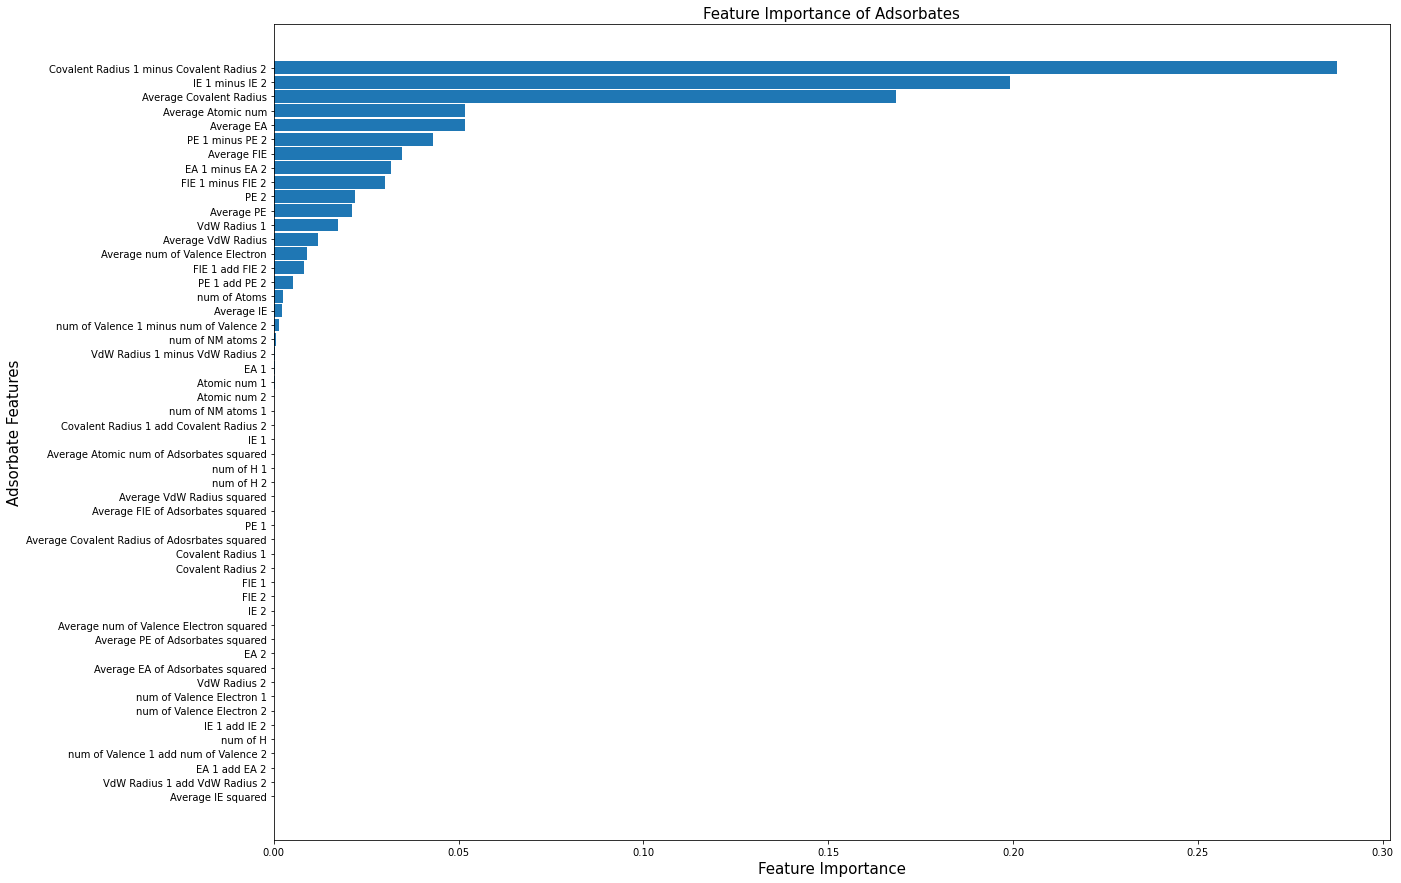

In [20]:
feature_importance(XGBRegressor(), final_df)

### Pearson's Correlation

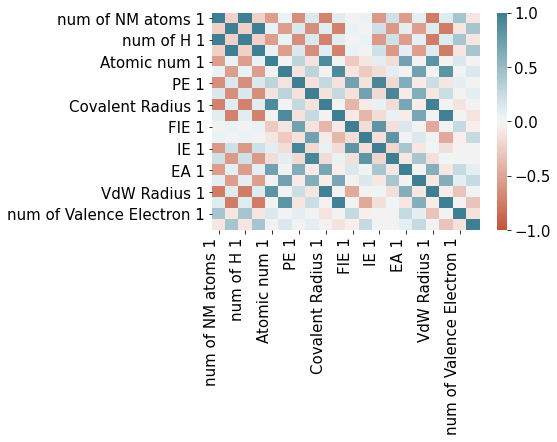

In [21]:
pearson_correlation(final_df)

## Round 2

In [22]:
# make a copy of the df from the previoud edition
df_v2 = final_df.copy()

In [23]:
# Drop the features
df_v2 = df_v2.drop(columns = ['PE 1 add PE 2',
       'Covalent Radius 1 add Covalent Radius 2','VdW Radius 1 add VdW Radius 2',
       'FIE 1 add FIE 2', 'EA 1 add EA 2',
       'num of Valence 1 add num of Valence 2',
       'IE 1 add IE 2'])

In [24]:
start = time.time()
val_score(df_v2, 2, regressors, results_df)
end = time.time()

print('Time taken to run this iteration was {} seconds'.format(int(end - start)))


Time taken to run this iteration was 54 seconds


In [25]:
results_df

,Gradient Boosting Regressor,K-Nearest Regressor,Random Forest Regressor,Support Vector Regressor,Ridge Regressor,X-Gradient Boosting Regressor,LightGBM Regressor
1,"[0.0215, 0.0355]","[0.0635, 0.0772]","[0.0457, 0.0584]","[0.0741, 0.0877]","[0.0731, 0.0892]","[0.0257, 0.0412]","[0.0556, 0.0653]"
2,"[0.0219, 0.036]","[0.0635, 0.0772]","[0.0459, 0.0586]","[0.0741, 0.0877]","[0.0764, 0.0936]","[0.0258, 0.0412]","[0.0558, 0.0656]"


### Feature Importance and Correlation (Round 2)

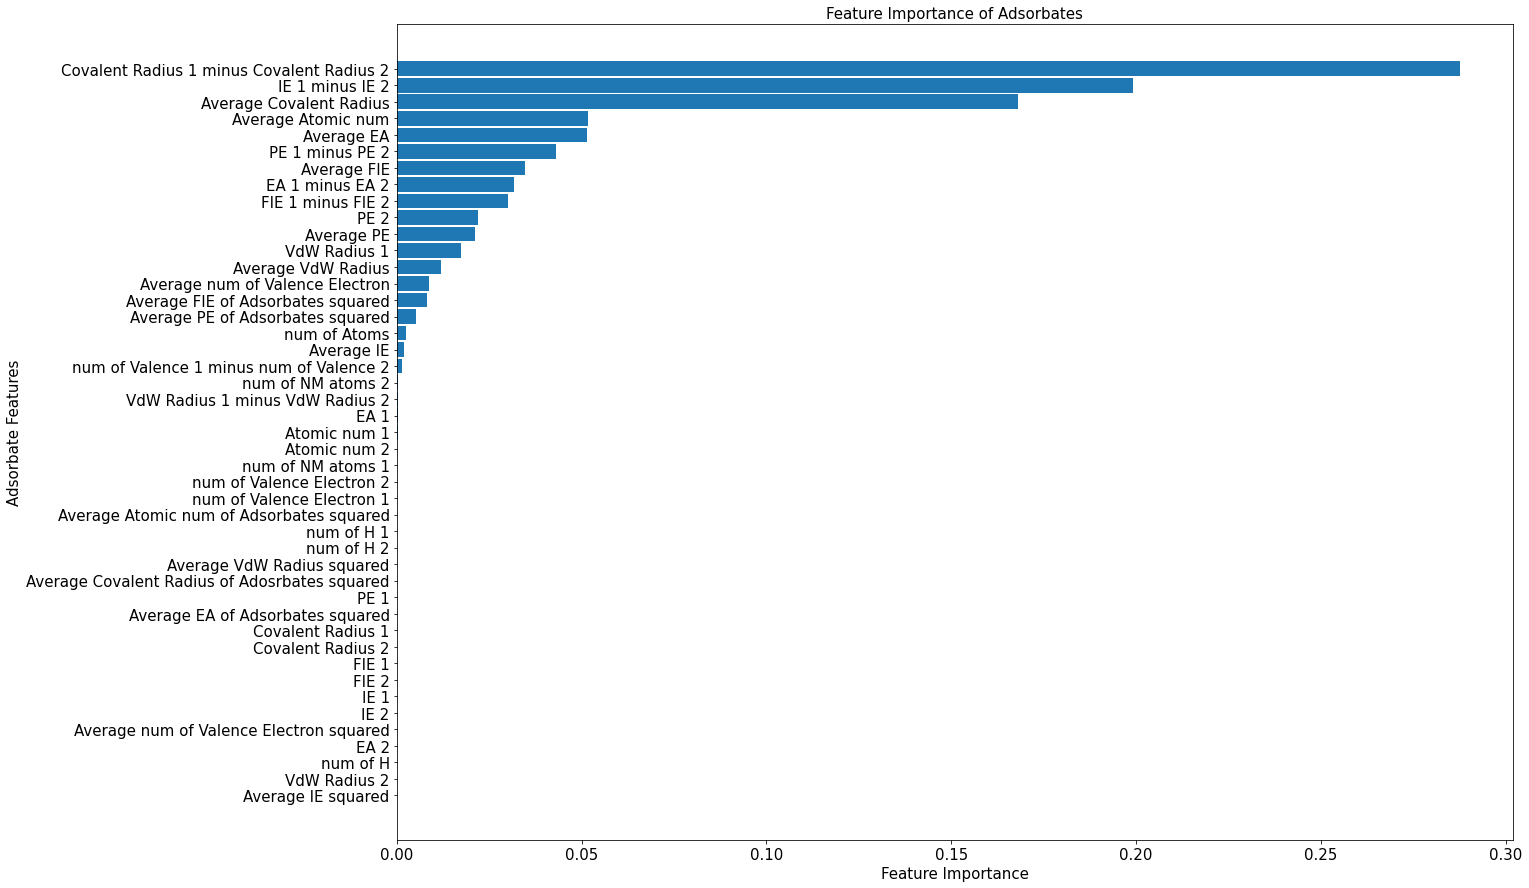

In [26]:
feature_importance(XGBRegressor(), df_v2)

## Round 3

In [27]:
df_v3 = df_v2.copy()

### Justification for dropping features

low importance single features were removed in this iteration of adjustments.

- 12 features (6 pairs) of adsorbate features were removed

In [28]:
df_v3 = df_v3.drop(columns = ['Average EA of Adsorbates squared', 'Average PE of Adsorbates squared',
       'Average Covalent Radius of Adosrbates squared',
       'Average FIE of Adsorbates squared',
       'Average Atomic num of Adsorbates squared',
       'Average num of Valence Electron squared', 'Average IE squared'])

In [29]:
start = time.time()
val_score(df_v3, 3, regressors, results_df)
end = time.time()

print('Time taken to run this iteration was {} seconds'.format(int(end - start)))


Time taken to run this iteration was 48 seconds


In [30]:
results_df

,Gradient Boosting Regressor,K-Nearest Regressor,Random Forest Regressor,Support Vector Regressor,Ridge Regressor,X-Gradient Boosting Regressor,LightGBM Regressor
1,"[0.0215, 0.0355]","[0.0635, 0.0772]","[0.0457, 0.0584]","[0.0741, 0.0877]","[0.0731, 0.0892]","[0.0257, 0.0412]","[0.0556, 0.0653]"
2,"[0.0219, 0.036]","[0.0635, 0.0772]","[0.0459, 0.0586]","[0.0741, 0.0877]","[0.0764, 0.0936]","[0.0258, 0.0412]","[0.0558, 0.0656]"
3,"[0.0225, 0.0364]","[0.0678, 0.0788]","[0.0464, 0.059]","[0.0752, 0.0887]","[0.075, 0.0929]","[0.0259, 0.0413]","[0.0559, 0.0657]"


### Feature Importance and Correlation (Round 3)

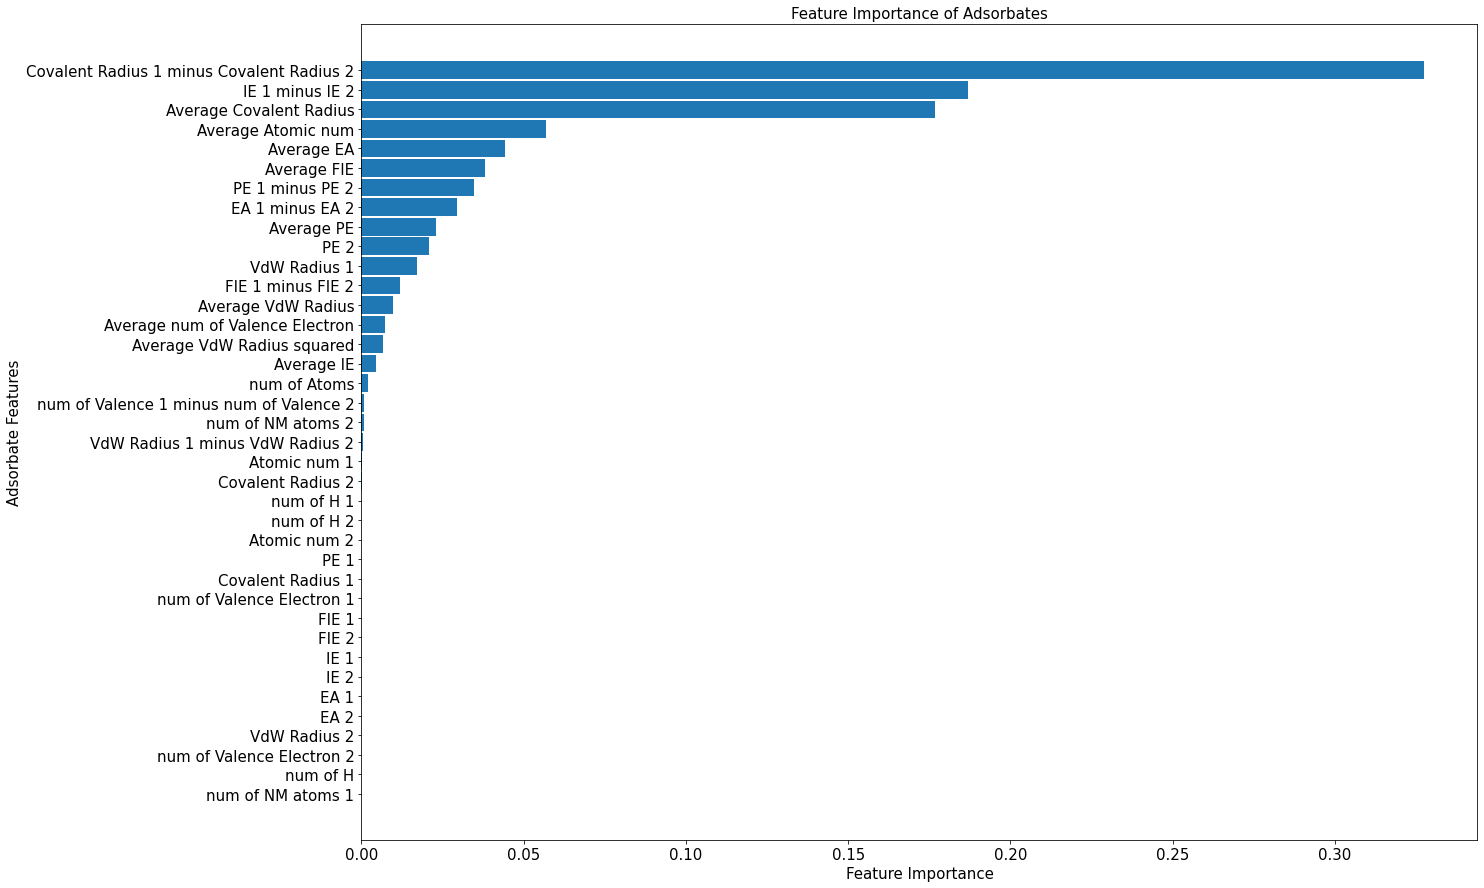

In [31]:
feature_importance(XGBRegressor(), df_v3)

## Round 4

In [32]:
df_v4 = df_v3.copy()

In [33]:
df_v4 = df_v4.drop(columns = ['num of H 1', 'num of H 2', 'num of H', 'FIE 1',
       'FIE 2', 'IE 1', 'IE 2'])

In [34]:
start = time.time()
val_score(df_v4, 4, regressors, results_df)
end = time.time()

print('Time taken to run this iteration was {} seconds'.format(int(end - start)))


Time taken to run this iteration was 44 seconds


In [35]:
results_df

,Gradient Boosting Regressor,K-Nearest Regressor,Random Forest Regressor,Support Vector Regressor,Ridge Regressor,X-Gradient Boosting Regressor,LightGBM Regressor
1,"[0.0215, 0.0355]","[0.0635, 0.0772]","[0.0457, 0.0584]","[0.0741, 0.0877]","[0.0731, 0.0892]","[0.0257, 0.0412]","[0.0556, 0.0653]"
2,"[0.0219, 0.036]","[0.0635, 0.0772]","[0.0459, 0.0586]","[0.0741, 0.0877]","[0.0764, 0.0936]","[0.0258, 0.0412]","[0.0558, 0.0656]"
3,"[0.0225, 0.0364]","[0.0678, 0.0788]","[0.0464, 0.059]","[0.0752, 0.0887]","[0.075, 0.0929]","[0.0259, 0.0413]","[0.0559, 0.0657]"
4,"[0.0218, 0.0356]","[0.0643, 0.076]","[0.0449, 0.0576]","[0.0733, 0.0864]","[0.0724, 0.0897]","[0.0253, 0.0408]","[0.0558, 0.0655]"


### Feature Importance and Correlation (Round 4)

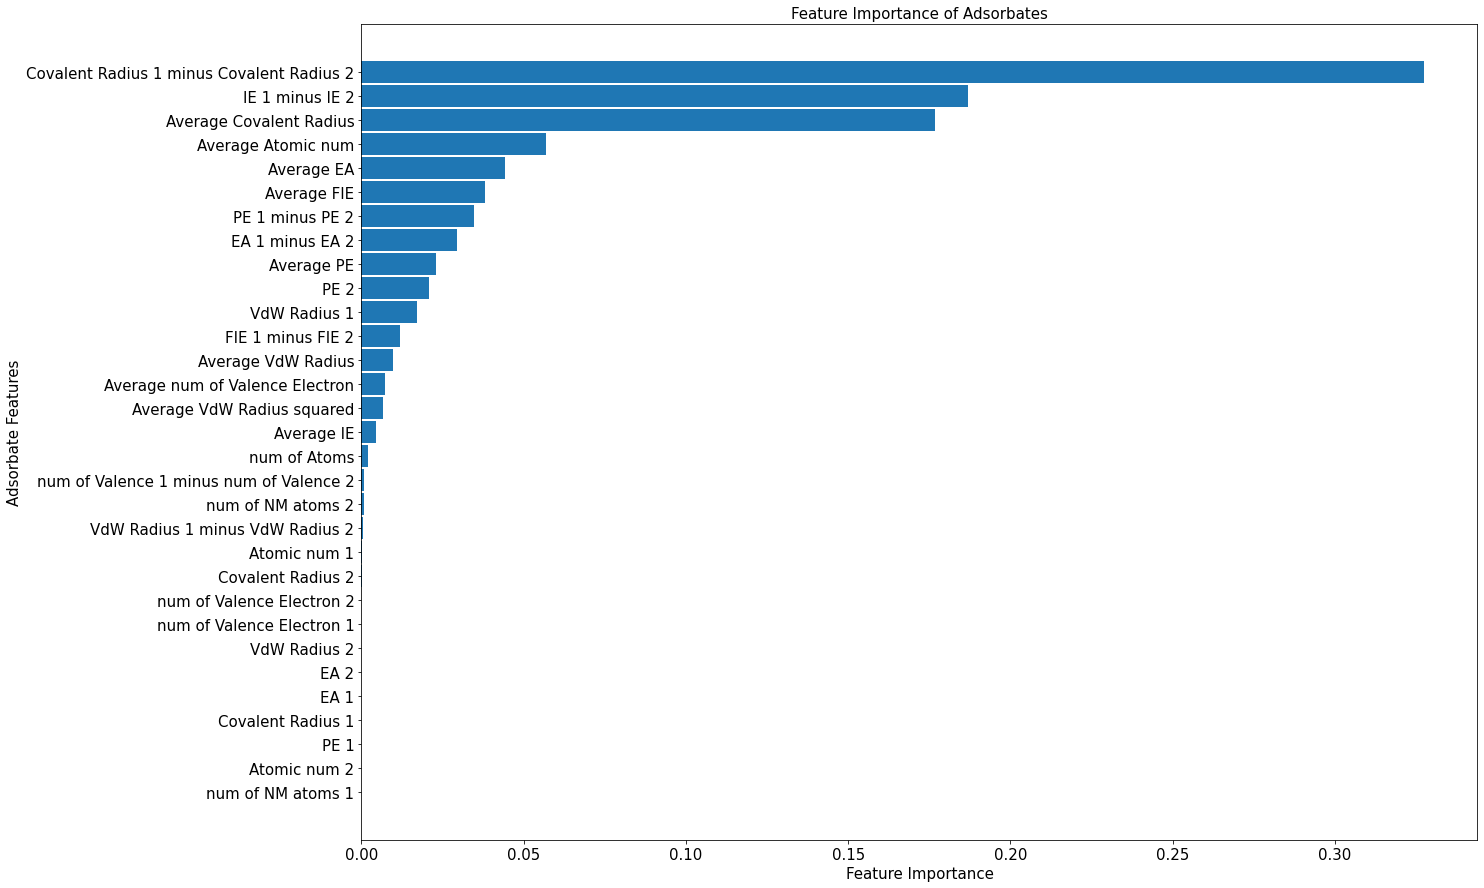

In [36]:
feature_importance(XGBRegressor(), df_v4)

## Round 5

In [37]:
df_v5 = df_v4.copy()

In [38]:
df_v5 = df_v5.drop(columns = ['num of NM atoms 1', 'num of NM atoms 2', 'EA 1', 'EA 2', 'Atomic num 1',
       'Atomic num 2', 'PE 1', 'PE 2', 'VdW Radius 1',
       'VdW Radius 2', 'Covalent Radius 1', 'Covalent Radius 2', 
       'num of Valence Electron 1', 'num of Valence Electron 2', 'Average VdW Radius squared', 'VdW Radius 1 minus VdW Radius 2',
       'Average IE', 'EA 1 minus EA 2'])

In [39]:
start = time.time()
val_score(df_v5, 5, regressors, results_df)
end = time.time()

print('Time taken to run this iteration was {} seconds'.format(int(end - start)))


Time taken to run this iteration was 38 seconds


In [40]:
results_df

,Gradient Boosting Regressor,K-Nearest Regressor,Random Forest Regressor,Support Vector Regressor,Ridge Regressor,X-Gradient Boosting Regressor,LightGBM Regressor
1,"[0.0215, 0.0355]","[0.0635, 0.0772]","[0.0457, 0.0584]","[0.0741, 0.0877]","[0.0731, 0.0892]","[0.0257, 0.0412]","[0.0556, 0.0653]"
2,"[0.0219, 0.036]","[0.0635, 0.0772]","[0.0459, 0.0586]","[0.0741, 0.0877]","[0.0764, 0.0936]","[0.0258, 0.0412]","[0.0558, 0.0656]"
3,"[0.0225, 0.0364]","[0.0678, 0.0788]","[0.0464, 0.059]","[0.0752, 0.0887]","[0.075, 0.0929]","[0.0259, 0.0413]","[0.0559, 0.0657]"
4,"[0.0218, 0.0356]","[0.0643, 0.076]","[0.0449, 0.0576]","[0.0733, 0.0864]","[0.0724, 0.0897]","[0.0253, 0.0408]","[0.0558, 0.0655]"
5,"[0.0162, 0.0293]","[0.061, 0.0753]","[0.0348, 0.0457]","[0.0707, 0.0814]","[0.0669, 0.082]","[0.0156, 0.03]","[0.0543, 0.064]"


### Feature Importance and Correlation (Round 5)

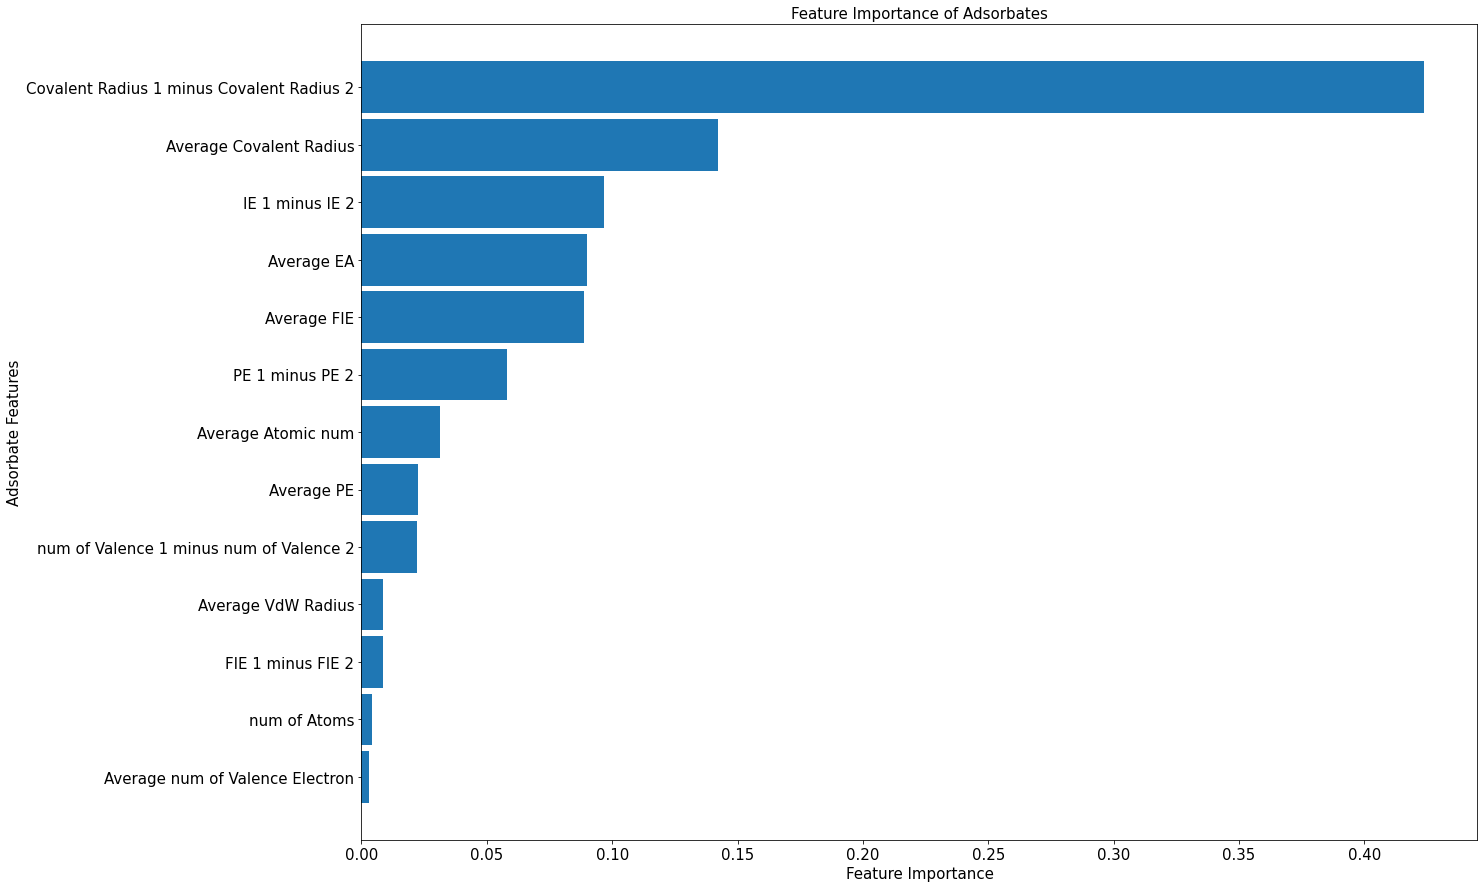

In [41]:
feature_importance(XGBRegressor(), df_v5)

### Pearson's Correlation (Round 5)

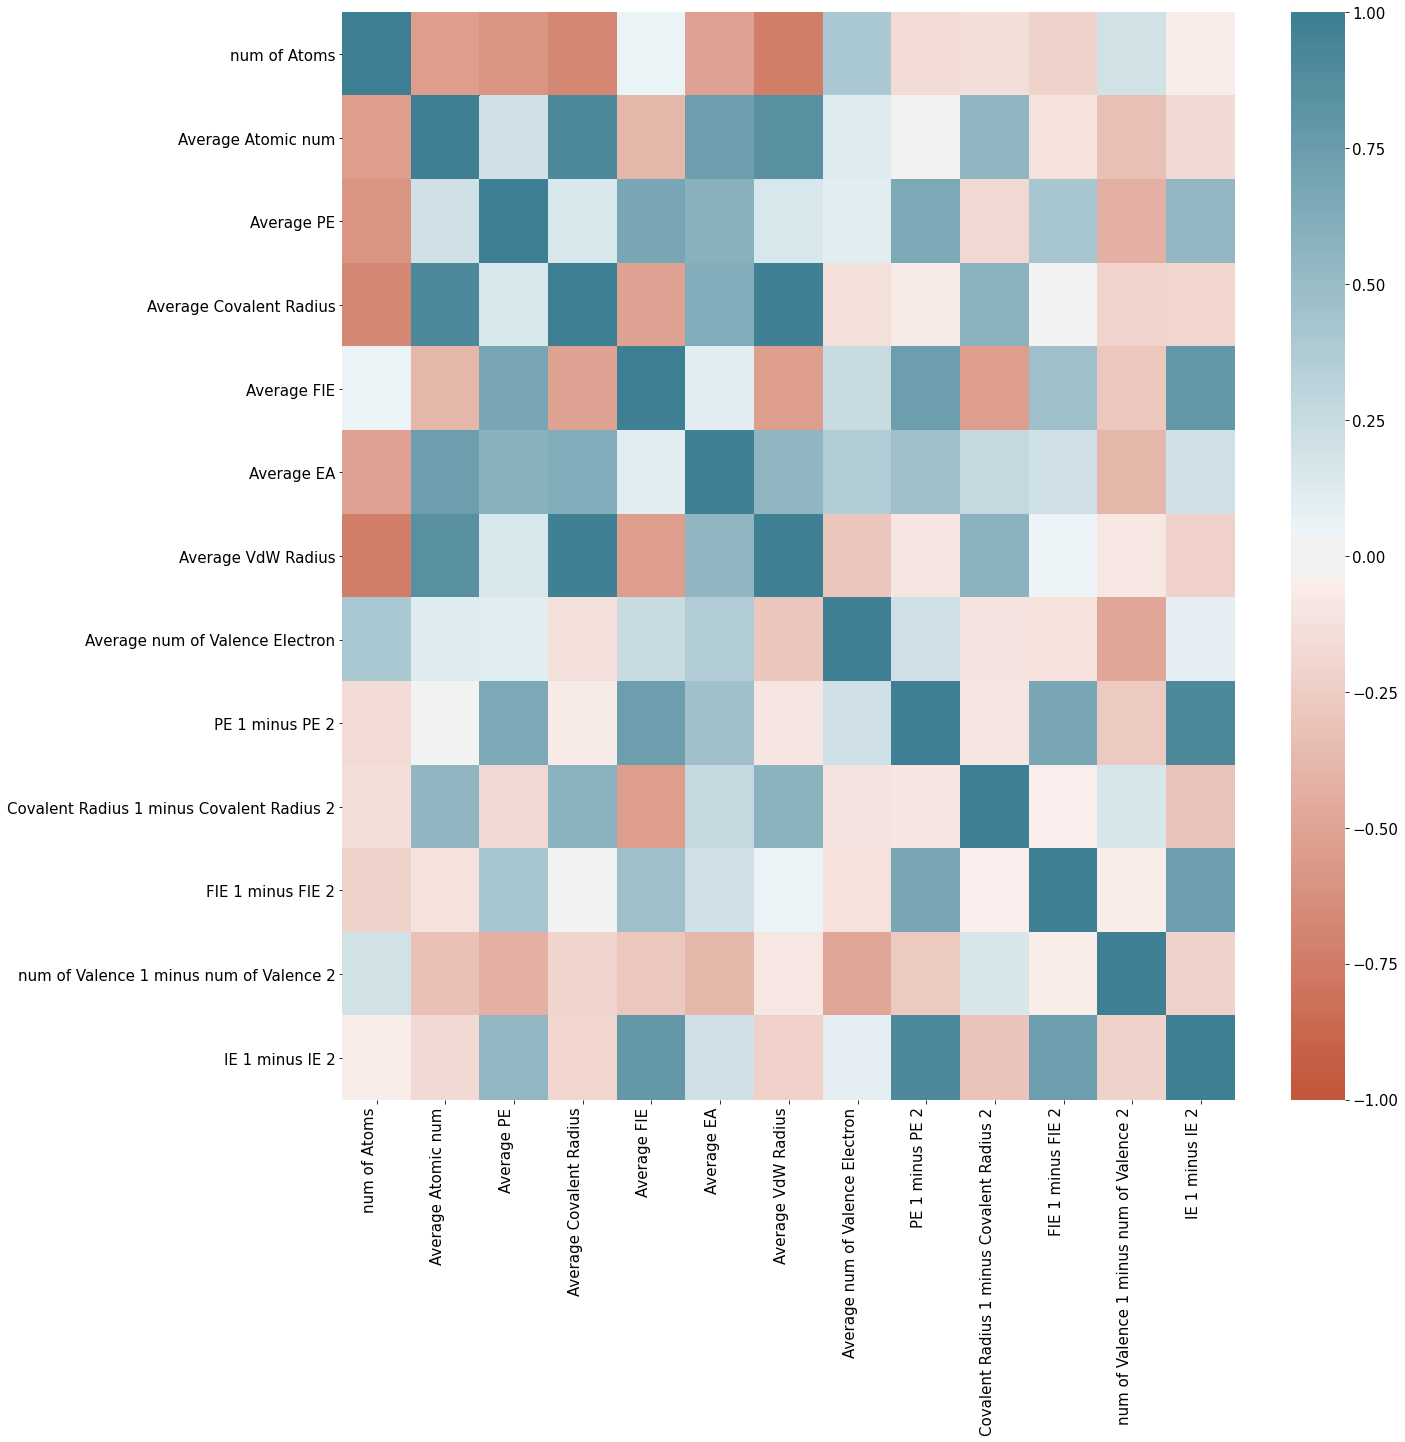

In [42]:
pearson_correlation(df_v5, last=True)

# 4. Hyperparameter Tuning

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
import xgboost
import lightgbm

In [44]:
GBR = GradientBoostingRegressor(random_state=42)
KNR = KNeighborsRegressor()
RFR = RandomForestRegressor(random_state=42)
SR = SVR()
ridge = Ridge(random_state=42)
xgbr = xgboost.XGBRegressor(random_state=42)
light = lightgbm.LGBMRegressor(random_state=42)

In [45]:
features = df_v5.iloc[:, 0:-1]
target = df_v5.iloc[:, -1]

In [46]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import RepeatedKFold


# Defining XGBR hyperparameters
xgbr_grid = {
    
    'min_child_weight': [1, 5, 10],
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.3, 1, 2],
    'colsample_bytree': [0.1, 0.5, 0.8],
    'colsample_bylevel': [0.1, 0.5, 0.8],

}


fold = RepeatedKFold(n_splits = 10, n_repeats = 1, random_state = 42)

In [47]:
# Performing Randomized CV search on XGBR
xgbr_grid_cv = GridSearchCV(estimator = xgbr, cv = fold,
            param_grid = xgbr_grid, n_jobs = -1, scoring='neg_root_mean_squared_error',
            verbose = 5, return_train_score = True, refit = True)

In [48]:
#xgbr_grid_cv.fit(features, target)

In [49]:
#xgbr_grid_cv.best_params_

In [50]:
#xgbr_grid_cv.best_score_

In [51]:
#xgbr_grid_cv.best_estimator_

In [52]:
from sklearn.model_selection import cross_val_score

xgbr_optimized = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=1, max_delta_step=0, max_depth=6, min_child_weight=5,
             monotone_constraints='()', n_estimators=300,
             n_jobs=12, num_parallel_tree=1, random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

rmse_score = cross_val_score(xgbr_optimized, features, target, cv = fold, scoring='neg_root_mean_squared_error')
mae_score = cross_val_score(xgbr_optimized, features, target, cv = fold, scoring='neg_mean_absolute_error')

In [53]:
optimized_xgbr_rmse = np.abs(rmse_score).mean()
optimized_xgbr_mae = np.abs(mae_score).mean()

In [54]:
optimized_xgbr_rmse, optimized_xgbr_mae

(0.01863290584064371, 0.01049728614157394)

# 5. Different Separation Ratios

In [55]:
from tqdm.auto import tqdm

separations = [2,3,4,5,6,7,8,9,10]

mae_results = []
rmse_results = []
r2_results = []

for split in tqdm(separations):
    fold = RepeatedKFold(n_splits=split, n_repeats=10, random_state=42)
    mae = cross_val_score(xgbr_optimized, features, target, cv=fold, scoring='neg_mean_absolute_error')
    rmse = cross_val_score(xgbr_optimized, features, target, cv=fold, scoring='neg_root_mean_squared_error')
    r2 = cross_val_score(xgbr_optimized, features, target, cv=fold, scoring='r2')
    mae_results.append(np.abs(mae).mean())
    rmse_results.append(np.abs(rmse).mean())
    r2_results.append(np.abs(r2).mean())

In [56]:
r2_results

[0.49800082305453425,
 0.6703000838310368,
 0.7507645222645417,
 0.773267416040239,
 0.8568795754368795,
 0.8152748312509983,
 0.8764311304024306,
 0.9124920074580891,
 0.9428764136345297]

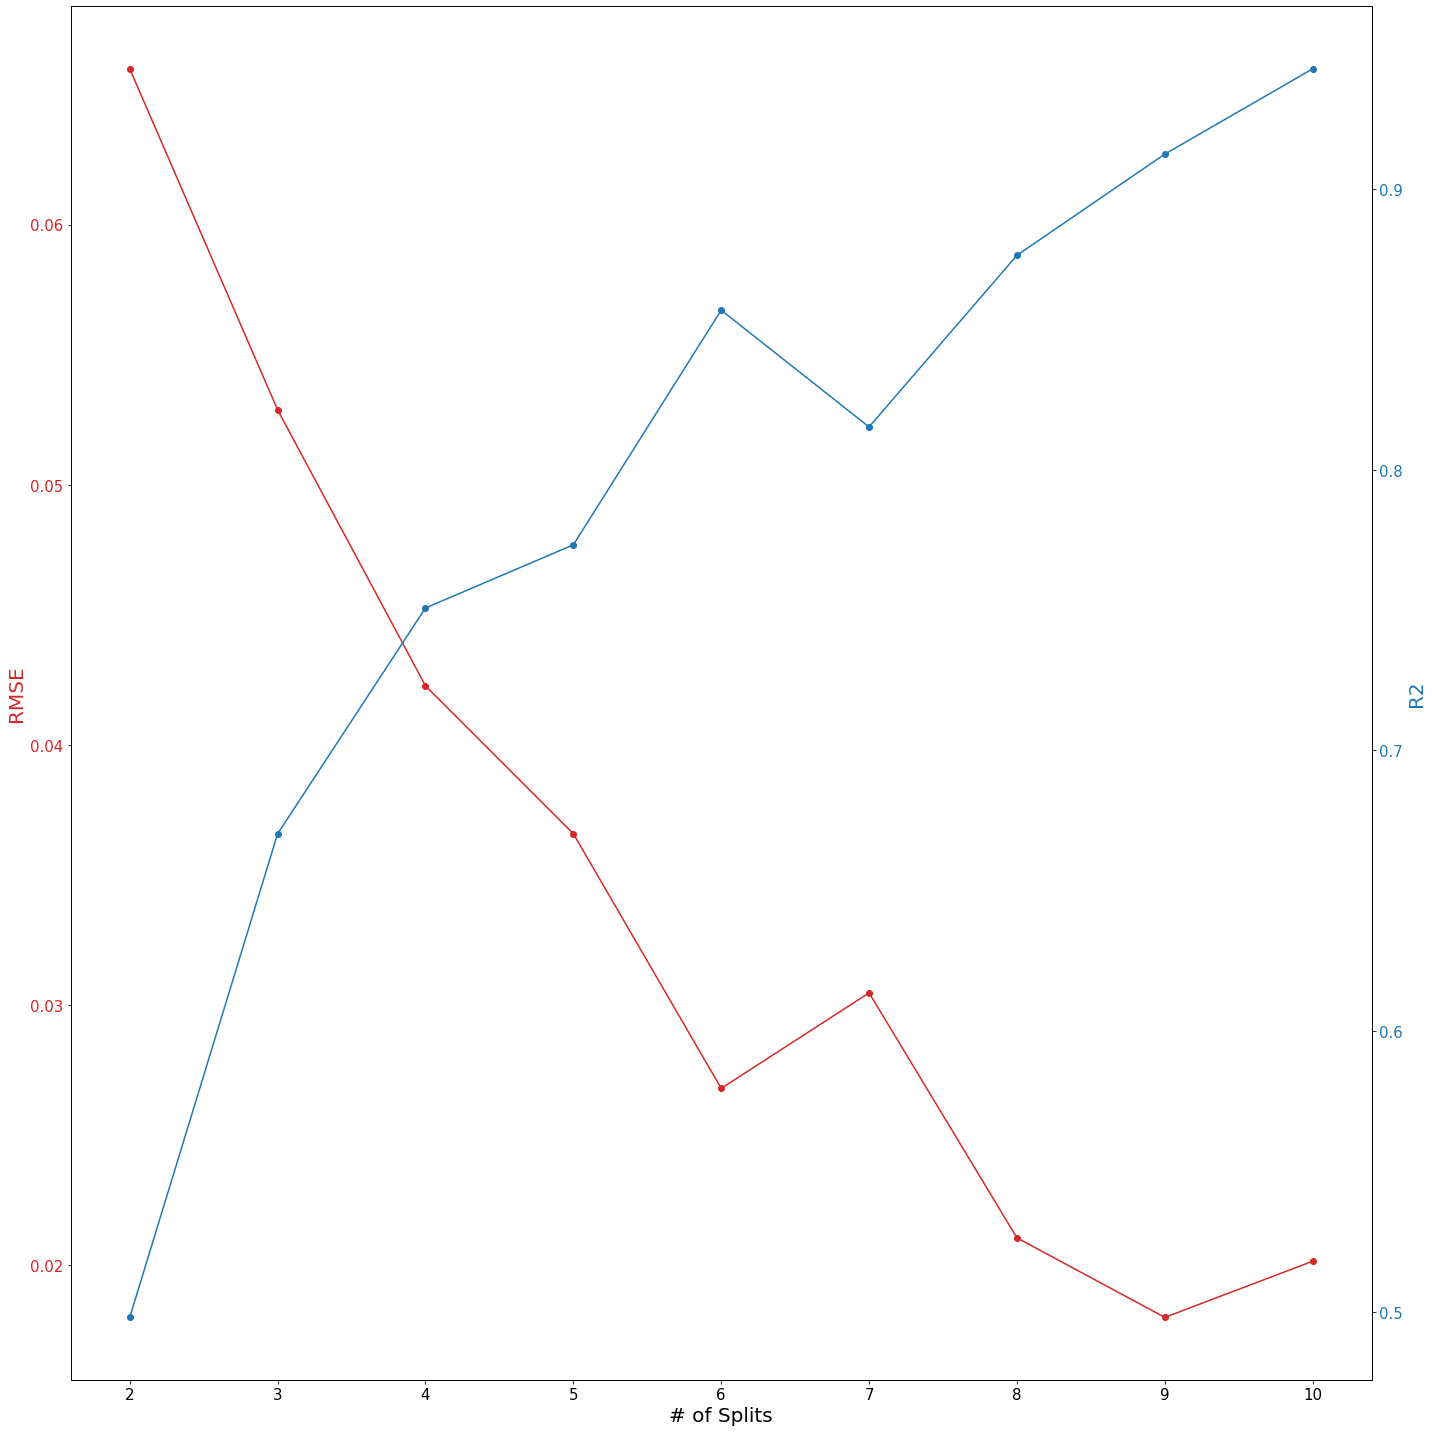

In [57]:
t = separations
data1 = rmse_results
data2 = r2_results

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('# of Splits', size = 20)
ax1.set_ylabel('RMSE', color=color, size = 20)
ax1.plot(t, data1, color=color, marker = 'o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2', color=color, size = 20)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color, marker = 'o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [58]:
from nn import train_model_rmse, train_model_mae, load_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = 0.9, random_state = 42)

In [59]:
start = time.time()
model_history_rmse = train_model_rmse(X_train, y_train, num_cols = len(features.columns))
end = time.time()

print('Time taken to train this neural network was {} seconds'.format(int(end - start)))

Epoch 1/1600
1/1 [==============================] - ETA: 0s - loss: 0.1482
Epoch 00001: val_loss improved from inf to 0.08594, saving model to model_best_weights.h5
1/1 [==============================] - 0s 178ms/step - loss: 0.1482 - val_loss: 0.0859
Epoch 2/1600
1/1 [==============================] - ETA: 0s - loss: 0.1459
Epoch 00002: val_loss improved from 0.08594 to 0.08549, saving model to model_best_weights.h5
1/1 [==============================] - 0s 44ms/step - loss: 0.1459 - val_loss: 0.0855
Epoch 3/1600
1/1 [==============================] - ETA: 0s - loss: 0.1343
Epoch 00003: val_loss improved from 0.08549 to 0.08514, saving model to model_best_weights.h5
1/1 [==============================] - 0s 47ms/step - loss: 0.1343 - val_loss: 0.0851
Epoch 4/1600
1/1 [==============================] - ETA: 0s - loss: 0.1311
Epoch 00004: val_loss improved from 0.08514 to 0.08475, saving model to model_best_weights.h5
1/1 [==============================] - 0s 48ms/step - loss: 0.1311 - 

Epoch 33/1600
1/1 [==============================] - ETA: 0s - loss: 0.0966
Epoch 00033: val_loss improved from 0.07413 to 0.07399, saving model to model_best_weights.h5
1/1 [==============================] - 0s 47ms/step - loss: 0.0966 - val_loss: 0.0740
Epoch 34/1600
1/1 [==============================] - ETA: 0s - loss: 0.1027
Epoch 00034: val_loss improved from 0.07399 to 0.07338, saving model to model_best_weights.h5
1/1 [==============================] - 0s 47ms/step - loss: 0.1027 - val_loss: 0.0734
Epoch 35/1600
1/1 [==============================] - ETA: 0s - loss: 0.0977
Epoch 00035: val_loss improved from 0.07338 to 0.07308, saving model to model_best_weights.h5
1/1 [==============================] - 0s 45ms/step - loss: 0.0977 - val_loss: 0.0731
Epoch 36/1600
1/1 [==============================] - ETA: 0s - loss: 0.0898
Epoch 00036: val_loss did not improve from 0.07308
1/1 [==============================] - 0s 17ms/step - loss: 0.0898 - val_loss: 0.0731
Epoch 37/1600
1/1 [

Epoch 68/1600
1/1 [==============================] - ETA: 0s - loss: 0.0687
Epoch 00068: val_loss did not improve from 0.05267
1/1 [==============================] - 0s 16ms/step - loss: 0.0687 - val_loss: 0.0655
Epoch 69/1600
1/1 [==============================] - ETA: 0s - loss: 0.0813
Epoch 00069: val_loss did not improve from 0.05267
1/1 [==============================] - 0s 15ms/step - loss: 0.0813 - val_loss: 0.0663
Epoch 70/1600
1/1 [==============================] - ETA: 0s - loss: 0.0803
Epoch 00070: val_loss did not improve from 0.05267
1/1 [==============================] - 0s 16ms/step - loss: 0.0803 - val_loss: 0.0668
Epoch 71/1600
1/1 [==============================] - ETA: 0s - loss: 0.0757
Epoch 00071: val_loss did not improve from 0.05267
1/1 [==============================] - 0s 16ms/step - loss: 0.0757 - val_loss: 0.0684
Epoch 72/1600
1/1 [==============================] - ETA: 0s - loss: 0.0723
Epoch 00072: val_loss did not improve from 0.05267
1/1 [================

Epoch 106/1600
1/1 [==============================] - ETA: 0s - loss: 0.0551
Epoch 00106: val_loss did not improve from 0.03428
1/1 [==============================] - 0s 17ms/step - loss: 0.0551 - val_loss: 0.0408
Epoch 107/1600
1/1 [==============================] - ETA: 0s - loss: 0.0603
Epoch 00107: val_loss did not improve from 0.03428
1/1 [==============================] - 0s 16ms/step - loss: 0.0603 - val_loss: 0.0426
Epoch 108/1600
1/1 [==============================] - ETA: 0s - loss: 0.0749
Epoch 00108: val_loss did not improve from 0.03428
1/1 [==============================] - 0s 16ms/step - loss: 0.0749 - val_loss: 0.0510
Epoch 109/1600
1/1 [==============================] - ETA: 0s - loss: 0.0540
Epoch 00109: val_loss did not improve from 0.03428
1/1 [==============================] - 0s 17ms/step - loss: 0.0540 - val_loss: 0.0659
Epoch 110/1600
1/1 [==============================] - ETA: 0s - loss: 0.0557
Epoch 00110: val_loss did not improve from 0.03428
1/1 [===========

1/1 [==============================] - ETA: 0s - loss: 0.0689
Epoch 00144: val_loss did not improve from 0.03428
1/1 [==============================] - 0s 16ms/step - loss: 0.0689 - val_loss: 0.0431
Epoch 145/1600
1/1 [==============================] - ETA: 0s - loss: 0.0477
Epoch 00145: val_loss did not improve from 0.03428
1/1 [==============================] - 0s 17ms/step - loss: 0.0477 - val_loss: 0.0401
Epoch 146/1600
1/1 [==============================] - ETA: 0s - loss: 0.0503
Epoch 00146: val_loss did not improve from 0.03428
1/1 [==============================] - 0s 16ms/step - loss: 0.0503 - val_loss: 0.0368
Epoch 147/1600
1/1 [==============================] - ETA: 0s - loss: 0.0710
Epoch 00147: val_loss did not improve from 0.03428
1/1 [==============================] - 0s 16ms/step - loss: 0.0710 - val_loss: 0.0351
Epoch 148/1600
1/1 [==============================] - ETA: 0s - loss: 0.0602
Epoch 00148: val_loss did not improve from 0.03428
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0585
Epoch 00182: val_loss did not improve from 0.03428
1/1 [==============================] - 0s 17ms/step - loss: 0.0585 - val_loss: 0.0626
Epoch 183/1600
1/1 [==============================] - ETA: 0s - loss: 0.0621
Epoch 00183: val_loss did not improve from 0.03428
1/1 [==============================] - 0s 16ms/step - loss: 0.0621 - val_loss: 0.0603
Epoch 184/1600
1/1 [==============================] - ETA: 0s - loss: 0.0569
Epoch 00184: val_loss did not improve from 0.03428
1/1 [==============================] - 0s 16ms/step - loss: 0.0569 - val_loss: 0.0569
Epoch 185/1600
1/1 [==============================] - ETA: 0s - loss: 0.0430
Epoch 00185: val_loss did not improve from 0.03428
1/1 [==============================] - 0s 17ms/step - loss: 0.0430 - val_loss: 0.0543
Epoch 186/1600
1/1 [==============================] - ETA: 0s - loss: 0.0545
Epoch 00186: val_loss did not improve from 0.03428
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0589
Epoch 00220: val_loss did not improve from 0.03092
1/1 [==============================] - 0s 17ms/step - loss: 0.0589 - val_loss: 0.0595
Epoch 221/1600
1/1 [==============================] - ETA: 0s - loss: 0.0525
Epoch 00221: val_loss did not improve from 0.03092
1/1 [==============================] - 0s 17ms/step - loss: 0.0525 - val_loss: 0.0553
Epoch 222/1600
1/1 [==============================] - ETA: 0s - loss: 0.0522
Epoch 00222: val_loss did not improve from 0.03092
1/1 [==============================] - 0s 16ms/step - loss: 0.0522 - val_loss: 0.0481
Epoch 223/1600
1/1 [==============================] - ETA: 0s - loss: 0.0548
Epoch 00223: val_loss did not improve from 0.03092
1/1 [==============================] - 0s 16ms/step - loss: 0.0548 - val_loss: 0.0385
Epoch 224/1600
1/1 [==============================] - ETA: 0s - loss: 0.0547
Epoch 00224: val_loss did not improve from 0.03092
1/1 [==========================

Epoch 257/1600
1/1 [==============================] - ETA: 0s - loss: 0.0464
Epoch 00257: val_loss did not improve from 0.01726
1/1 [==============================] - 0s 16ms/step - loss: 0.0464 - val_loss: 0.0286
Epoch 258/1600
1/1 [==============================] - ETA: 0s - loss: 0.0468
Epoch 00258: val_loss did not improve from 0.01726
1/1 [==============================] - 0s 17ms/step - loss: 0.0468 - val_loss: 0.0308
Epoch 259/1600
1/1 [==============================] - ETA: 0s - loss: 0.0400
Epoch 00259: val_loss did not improve from 0.01726
1/1 [==============================] - 0s 17ms/step - loss: 0.0400 - val_loss: 0.0317
Epoch 260/1600
1/1 [==============================] - ETA: 0s - loss: 0.0512
Epoch 00260: val_loss did not improve from 0.01726
1/1 [==============================] - 0s 17ms/step - loss: 0.0512 - val_loss: 0.0367
Epoch 261/1600
1/1 [==============================] - ETA: 0s - loss: 0.0512
Epoch 00261: val_loss did not improve from 0.01726
1/1 [===========

1/1 [==============================] - ETA: 0s - loss: 0.0533
Epoch 00295: val_loss did not improve from 0.01726
1/1 [==============================] - 0s 17ms/step - loss: 0.0533 - val_loss: 0.0234
Epoch 296/1600
1/1 [==============================] - ETA: 0s - loss: 0.0431
Epoch 00296: val_loss did not improve from 0.01726
1/1 [==============================] - 0s 17ms/step - loss: 0.0431 - val_loss: 0.0235
Epoch 297/1600
1/1 [==============================] - ETA: 0s - loss: 0.0554
Epoch 00297: val_loss did not improve from 0.01726
1/1 [==============================] - 0s 16ms/step - loss: 0.0554 - val_loss: 0.0245
Epoch 298/1600
1/1 [==============================] - ETA: 0s - loss: 0.0472
Epoch 00298: val_loss did not improve from 0.01726
1/1 [==============================] - 0s 16ms/step - loss: 0.0472 - val_loss: 0.0254
Epoch 299/1600
1/1 [==============================] - ETA: 0s - loss: 0.0565
Epoch 00299: val_loss did not improve from 0.01726
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0398
Epoch 00333: val_loss did not improve from 0.01726
1/1 [==============================] - 0s 15ms/step - loss: 0.0398 - val_loss: 0.0338
Epoch 334/1600
1/1 [==============================] - ETA: 0s - loss: 0.0452
Epoch 00334: val_loss did not improve from 0.01726
1/1 [==============================] - 0s 15ms/step - loss: 0.0452 - val_loss: 0.0327
Epoch 335/1600
1/1 [==============================] - ETA: 0s - loss: 0.0440
Epoch 00335: val_loss did not improve from 0.01726
1/1 [==============================] - 0s 16ms/step - loss: 0.0440 - val_loss: 0.0303
Epoch 336/1600
1/1 [==============================] - ETA: 0s - loss: 0.0505
Epoch 00336: val_loss did not improve from 0.01726
1/1 [==============================] - 0s 16ms/step - loss: 0.0505 - val_loss: 0.0280
Epoch 337/1600
1/1 [==============================] - ETA: 0s - loss: 0.0566
Epoch 00337: val_loss did not improve from 0.01726
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0477
Epoch 00371: val_loss did not improve from 0.01726
1/1 [==============================] - 0s 16ms/step - loss: 0.0477 - val_loss: 0.0333
Epoch 372/1600
1/1 [==============================] - ETA: 0s - loss: 0.0584
Epoch 00372: val_loss did not improve from 0.01726
1/1 [==============================] - 0s 16ms/step - loss: 0.0584 - val_loss: 0.0321
Epoch 373/1600
1/1 [==============================] - ETA: 0s - loss: 0.0448
Epoch 00373: val_loss did not improve from 0.01726
1/1 [==============================] - 0s 16ms/step - loss: 0.0448 - val_loss: 0.0281
Epoch 374/1600
1/1 [==============================] - ETA: 0s - loss: 0.0431
Epoch 00374: val_loss did not improve from 0.01726
1/1 [==============================] - 0s 16ms/step - loss: 0.0431 - val_loss: 0.0270
Epoch 375/1600
1/1 [==============================] - ETA: 0s - loss: 0.0473
Epoch 00375: val_loss did not improve from 0.01726
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0466
Epoch 00409: val_loss did not improve from 0.01726
1/1 [==============================] - 0s 15ms/step - loss: 0.0466 - val_loss: 0.0305
Epoch 410/1600
1/1 [==============================] - ETA: 0s - loss: 0.0513
Epoch 00410: val_loss did not improve from 0.01726
1/1 [==============================] - 0s 15ms/step - loss: 0.0513 - val_loss: 0.0279
Epoch 411/1600
1/1 [==============================] - ETA: 0s - loss: 0.0451
Epoch 00411: val_loss did not improve from 0.01726
1/1 [==============================] - 0s 15ms/step - loss: 0.0451 - val_loss: 0.0247
Epoch 412/1600
1/1 [==============================] - ETA: 0s - loss: 0.0443
Epoch 00412: val_loss did not improve from 0.01726
1/1 [==============================] - 0s 16ms/step - loss: 0.0443 - val_loss: 0.0212
Epoch 413/1600
1/1 [==============================] - ETA: 0s - loss: 0.0536
Epoch 00413: val_loss improved from 0.01726 to 0.01572, saving model to model_best

1/1 [==============================] - ETA: 0s - loss: 0.0509
Epoch 00447: val_loss did not improve from 0.01572
1/1 [==============================] - 0s 17ms/step - loss: 0.0509 - val_loss: 0.0234
Epoch 448/1600
1/1 [==============================] - ETA: 0s - loss: 0.0446
Epoch 00448: val_loss did not improve from 0.01572
1/1 [==============================] - 0s 17ms/step - loss: 0.0446 - val_loss: 0.0249
Epoch 449/1600
1/1 [==============================] - ETA: 0s - loss: 0.0459
Epoch 00449: val_loss did not improve from 0.01572
1/1 [==============================] - 0s 16ms/step - loss: 0.0459 - val_loss: 0.0250
Epoch 450/1600
1/1 [==============================] - ETA: 0s - loss: 0.0524
Epoch 00450: val_loss did not improve from 0.01572
1/1 [==============================] - 0s 17ms/step - loss: 0.0524 - val_loss: 0.0268
Epoch 451/1600
1/1 [==============================] - ETA: 0s - loss: 0.0450
Epoch 00451: val_loss did not improve from 0.01572
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0556
Epoch 00485: val_loss did not improve from 0.01572
1/1 [==============================] - 0s 16ms/step - loss: 0.0556 - val_loss: 0.0299
Epoch 486/1600
1/1 [==============================] - ETA: 0s - loss: 0.0556
Epoch 00486: val_loss did not improve from 0.01572
1/1 [==============================] - 0s 16ms/step - loss: 0.0556 - val_loss: 0.0269
Epoch 487/1600
1/1 [==============================] - ETA: 0s - loss: 0.0508
Epoch 00487: val_loss did not improve from 0.01572
1/1 [==============================] - 0s 16ms/step - loss: 0.0508 - val_loss: 0.0246
Epoch 488/1600
1/1 [==============================] - ETA: 0s - loss: 0.0414
Epoch 00488: val_loss did not improve from 0.01572
1/1 [==============================] - 0s 17ms/step - loss: 0.0414 - val_loss: 0.0213
Epoch 489/1600
1/1 [==============================] - ETA: 0s - loss: 0.0437
Epoch 00489: val_loss did not improve from 0.01572
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0397
Epoch 00523: val_loss did not improve from 0.01572
1/1 [==============================] - 0s 16ms/step - loss: 0.0397 - val_loss: 0.0245
Epoch 524/1600
1/1 [==============================] - ETA: 0s - loss: 0.0461
Epoch 00524: val_loss did not improve from 0.01572
1/1 [==============================] - 0s 16ms/step - loss: 0.0461 - val_loss: 0.0240
Epoch 525/1600
1/1 [==============================] - ETA: 0s - loss: 0.0371
Epoch 00525: val_loss did not improve from 0.01572
1/1 [==============================] - 0s 17ms/step - loss: 0.0371 - val_loss: 0.0239
Epoch 526/1600
1/1 [==============================] - ETA: 0s - loss: 0.0451
Epoch 00526: val_loss did not improve from 0.01572
1/1 [==============================] - 0s 17ms/step - loss: 0.0451 - val_loss: 0.0212
Epoch 527/1600
1/1 [==============================] - ETA: 0s - loss: 0.0380
Epoch 00527: val_loss did not improve from 0.01572
1/1 [==========================

Epoch 561/1600
1/1 [==============================] - ETA: 0s - loss: 0.0388
Epoch 00561: val_loss did not improve from 0.01512
1/1 [==============================] - 0s 16ms/step - loss: 0.0388 - val_loss: 0.0296
Epoch 562/1600
1/1 [==============================] - ETA: 0s - loss: 0.0328
Epoch 00562: val_loss did not improve from 0.01512
1/1 [==============================] - 0s 16ms/step - loss: 0.0328 - val_loss: 0.0313
Epoch 563/1600
1/1 [==============================] - ETA: 0s - loss: 0.0453
Epoch 00563: val_loss did not improve from 0.01512
1/1 [==============================] - 0s 17ms/step - loss: 0.0453 - val_loss: 0.0285
Epoch 564/1600
1/1 [==============================] - ETA: 0s - loss: 0.0433
Epoch 00564: val_loss did not improve from 0.01512
1/1 [==============================] - 0s 16ms/step - loss: 0.0433 - val_loss: 0.0248
Epoch 565/1600
1/1 [==============================] - ETA: 0s - loss: 0.0470
Epoch 00565: val_loss did not improve from 0.01512
1/1 [===========

1/1 [==============================] - ETA: 0s - loss: 0.0479
Epoch 00599: val_loss did not improve from 0.01512
1/1 [==============================] - 0s 16ms/step - loss: 0.0479 - val_loss: 0.0192
Epoch 600/1600
1/1 [==============================] - ETA: 0s - loss: 0.0408
Epoch 00600: val_loss did not improve from 0.01512
1/1 [==============================] - 0s 16ms/step - loss: 0.0408 - val_loss: 0.0182
Epoch 601/1600
1/1 [==============================] - ETA: 0s - loss: 0.0393
Epoch 00601: val_loss did not improve from 0.01512
1/1 [==============================] - 0s 16ms/step - loss: 0.0393 - val_loss: 0.0183
Epoch 602/1600
1/1 [==============================] - ETA: 0s - loss: 0.0501
Epoch 00602: val_loss did not improve from 0.01512
1/1 [==============================] - 0s 16ms/step - loss: 0.0501 - val_loss: 0.0218
Epoch 603/1600
1/1 [==============================] - ETA: 0s - loss: 0.0390
Epoch 00603: val_loss did not improve from 0.01512
1/1 [==========================

Epoch 637/1600
1/1 [==============================] - ETA: 0s - loss: 0.0311
Epoch 00637: val_loss did not improve from 0.01254
1/1 [==============================] - 0s 16ms/step - loss: 0.0311 - val_loss: 0.0312
Epoch 638/1600
1/1 [==============================] - ETA: 0s - loss: 0.0490
Epoch 00638: val_loss did not improve from 0.01254
1/1 [==============================] - 0s 16ms/step - loss: 0.0490 - val_loss: 0.0361
Epoch 639/1600
1/1 [==============================] - ETA: 0s - loss: 0.0401
Epoch 00639: val_loss did not improve from 0.01254
1/1 [==============================] - 0s 16ms/step - loss: 0.0401 - val_loss: 0.0377
Epoch 640/1600
1/1 [==============================] - ETA: 0s - loss: 0.0435
Epoch 00640: val_loss did not improve from 0.01254
1/1 [==============================] - 0s 17ms/step - loss: 0.0435 - val_loss: 0.0350
Epoch 641/1600
1/1 [==============================] - ETA: 0s - loss: 0.0478
Epoch 00641: val_loss did not improve from 0.01254
1/1 [===========

1/1 [==============================] - ETA: 0s - loss: 0.0457
Epoch 00675: val_loss did not improve from 0.01254
1/1 [==============================] - 0s 16ms/step - loss: 0.0457 - val_loss: 0.0374
Epoch 676/1600
1/1 [==============================] - ETA: 0s - loss: 0.0466
Epoch 00676: val_loss did not improve from 0.01254
1/1 [==============================] - 0s 24ms/step - loss: 0.0466 - val_loss: 0.0341
Epoch 677/1600
1/1 [==============================] - ETA: 0s - loss: 0.0390
Epoch 00677: val_loss did not improve from 0.01254
1/1 [==============================] - 0s 18ms/step - loss: 0.0390 - val_loss: 0.0301
Epoch 678/1600
1/1 [==============================] - ETA: 0s - loss: 0.0383
Epoch 00678: val_loss did not improve from 0.01254
1/1 [==============================] - 0s 18ms/step - loss: 0.0383 - val_loss: 0.0267
Epoch 679/1600
1/1 [==============================] - ETA: 0s - loss: 0.0392
Epoch 00679: val_loss did not improve from 0.01254
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0372
Epoch 00713: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0372 - val_loss: 0.0206
Epoch 714/1600
1/1 [==============================] - ETA: 0s - loss: 0.0353
Epoch 00714: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0353 - val_loss: 0.0208
Epoch 715/1600
1/1 [==============================] - ETA: 0s - loss: 0.0365
Epoch 00715: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0365 - val_loss: 0.0235
Epoch 716/1600
1/1 [==============================] - ETA: 0s - loss: 0.0332
Epoch 00716: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0332 - val_loss: 0.0229
Epoch 717/1600
1/1 [==============================] - ETA: 0s - loss: 0.0428
Epoch 00717: val_loss did not improve from 0.01135
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0411
Epoch 00751: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0411 - val_loss: 0.0263
Epoch 752/1600
1/1 [==============================] - ETA: 0s - loss: 0.0409
Epoch 00752: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 15ms/step - loss: 0.0409 - val_loss: 0.0267
Epoch 753/1600
1/1 [==============================] - ETA: 0s - loss: 0.0488
Epoch 00753: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0488 - val_loss: 0.0252
Epoch 754/1600
1/1 [==============================] - ETA: 0s - loss: 0.0375
Epoch 00754: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0375 - val_loss: 0.0236
Epoch 755/1600
1/1 [==============================] - ETA: 0s - loss: 0.0388
Epoch 00755: val_loss did not improve from 0.01135
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0384
Epoch 00789: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0384 - val_loss: 0.0191
Epoch 790/1600
1/1 [==============================] - ETA: 0s - loss: 0.0460
Epoch 00790: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 17ms/step - loss: 0.0460 - val_loss: 0.0158
Epoch 791/1600
1/1 [==============================] - ETA: 0s - loss: 0.0382
Epoch 00791: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0382 - val_loss: 0.0147
Epoch 792/1600
1/1 [==============================] - ETA: 0s - loss: 0.0431
Epoch 00792: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 17ms/step - loss: 0.0431 - val_loss: 0.0164
Epoch 793/1600
1/1 [==============================] - ETA: 0s - loss: 0.0326
Epoch 00793: val_loss did not improve from 0.01135
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0463
Epoch 00827: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0463 - val_loss: 0.0254
Epoch 828/1600
1/1 [==============================] - ETA: 0s - loss: 0.0471
Epoch 00828: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 15ms/step - loss: 0.0471 - val_loss: 0.0248
Epoch 829/1600
1/1 [==============================] - ETA: 0s - loss: 0.0433
Epoch 00829: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 15ms/step - loss: 0.0433 - val_loss: 0.0266
Epoch 830/1600
1/1 [==============================] - ETA: 0s - loss: 0.0373
Epoch 00830: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0373 - val_loss: 0.0272
Epoch 831/1600
1/1 [==============================] - ETA: 0s - loss: 0.0459
Epoch 00831: val_loss did not improve from 0.01135
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0339
Epoch 00865: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 15ms/step - loss: 0.0339 - val_loss: 0.0279
Epoch 866/1600
1/1 [==============================] - ETA: 0s - loss: 0.0458
Epoch 00866: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 15ms/step - loss: 0.0458 - val_loss: 0.0281
Epoch 867/1600
1/1 [==============================] - ETA: 0s - loss: 0.0475
Epoch 00867: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 15ms/step - loss: 0.0475 - val_loss: 0.0287
Epoch 868/1600
1/1 [==============================] - ETA: 0s - loss: 0.0449
Epoch 00868: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0449 - val_loss: 0.0323
Epoch 869/1600
1/1 [==============================] - ETA: 0s - loss: 0.0429
Epoch 00869: val_loss did not improve from 0.01135
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0468
Epoch 00903: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 15ms/step - loss: 0.0468 - val_loss: 0.0234
Epoch 904/1600
1/1 [==============================] - ETA: 0s - loss: 0.0449
Epoch 00904: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0449 - val_loss: 0.0248
Epoch 905/1600
1/1 [==============================] - ETA: 0s - loss: 0.0413
Epoch 00905: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0413 - val_loss: 0.0252
Epoch 906/1600
1/1 [==============================] - ETA: 0s - loss: 0.0422
Epoch 00906: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0422 - val_loss: 0.0282
Epoch 907/1600
1/1 [==============================] - ETA: 0s - loss: 0.0459
Epoch 00907: val_loss did not improve from 0.01135
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0389
Epoch 00941: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0389 - val_loss: 0.0263
Epoch 942/1600
1/1 [==============================] - ETA: 0s - loss: 0.0375
Epoch 00942: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 15ms/step - loss: 0.0375 - val_loss: 0.0268
Epoch 943/1600
1/1 [==============================] - ETA: 0s - loss: 0.0417
Epoch 00943: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0417 - val_loss: 0.0294
Epoch 944/1600
1/1 [==============================] - ETA: 0s - loss: 0.0383
Epoch 00944: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0383 - val_loss: 0.0350
Epoch 945/1600
1/1 [==============================] - ETA: 0s - loss: 0.0428
Epoch 00945: val_loss did not improve from 0.01135
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0482
Epoch 00979: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0482 - val_loss: 0.0213
Epoch 980/1600
1/1 [==============================] - ETA: 0s - loss: 0.0351
Epoch 00980: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 15ms/step - loss: 0.0351 - val_loss: 0.0239
Epoch 981/1600
1/1 [==============================] - ETA: 0s - loss: 0.0394
Epoch 00981: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 15ms/step - loss: 0.0394 - val_loss: 0.0268
Epoch 982/1600
1/1 [==============================] - ETA: 0s - loss: 0.0353
Epoch 00982: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0353 - val_loss: 0.0291
Epoch 983/1600
1/1 [==============================] - ETA: 0s - loss: 0.0355
Epoch 00983: val_loss did not improve from 0.01135
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0356
Epoch 01017: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0356 - val_loss: 0.0286
Epoch 1018/1600
1/1 [==============================] - ETA: 0s - loss: 0.0484
Epoch 01018: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0484 - val_loss: 0.0290
Epoch 1019/1600
1/1 [==============================] - ETA: 0s - loss: 0.0379
Epoch 01019: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0379 - val_loss: 0.0304
Epoch 1020/1600
1/1 [==============================] - ETA: 0s - loss: 0.0445
Epoch 01020: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0445 - val_loss: 0.0294
Epoch 1021/1600
1/1 [==============================] - ETA: 0s - loss: 0.0402
Epoch 01021: val_loss did not improve from 0.01135
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0358
Epoch 01055: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0358 - val_loss: 0.0281
Epoch 1056/1600
1/1 [==============================] - ETA: 0s - loss: 0.0357
Epoch 01056: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 15ms/step - loss: 0.0357 - val_loss: 0.0317
Epoch 1057/1600
1/1 [==============================] - ETA: 0s - loss: 0.0467
Epoch 01057: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 15ms/step - loss: 0.0467 - val_loss: 0.0307
Epoch 1058/1600
1/1 [==============================] - ETA: 0s - loss: 0.0408
Epoch 01058: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0408 - val_loss: 0.0270
Epoch 1059/1600
1/1 [==============================] - ETA: 0s - loss: 0.0398
Epoch 01059: val_loss did not improve from 0.01135
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0468
Epoch 01093: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 15ms/step - loss: 0.0468 - val_loss: 0.0241
Epoch 1094/1600
1/1 [==============================] - ETA: 0s - loss: 0.0333
Epoch 01094: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 15ms/step - loss: 0.0333 - val_loss: 0.0226
Epoch 1095/1600
1/1 [==============================] - ETA: 0s - loss: 0.0439
Epoch 01095: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0439 - val_loss: 0.0231
Epoch 1096/1600
1/1 [==============================] - ETA: 0s - loss: 0.0470
Epoch 01096: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0470 - val_loss: 0.0241
Epoch 1097/1600
1/1 [==============================] - ETA: 0s - loss: 0.0424
Epoch 01097: val_loss did not improve from 0.01135
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0397
Epoch 01131: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0397 - val_loss: 0.0405
Epoch 1132/1600
1/1 [==============================] - ETA: 0s - loss: 0.0420
Epoch 01132: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 15ms/step - loss: 0.0420 - val_loss: 0.0359
Epoch 1133/1600
1/1 [==============================] - ETA: 0s - loss: 0.0402
Epoch 01133: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0402 - val_loss: 0.0338
Epoch 1134/1600
1/1 [==============================] - ETA: 0s - loss: 0.0451
Epoch 01134: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0451 - val_loss: 0.0302
Epoch 1135/1600
1/1 [==============================] - ETA: 0s - loss: 0.0312
Epoch 01135: val_loss did not improve from 0.01135
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0343
Epoch 01169: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 15ms/step - loss: 0.0343 - val_loss: 0.0232
Epoch 1170/1600
1/1 [==============================] - ETA: 0s - loss: 0.0452
Epoch 01170: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0452 - val_loss: 0.0230
Epoch 1171/1600
1/1 [==============================] - ETA: 0s - loss: 0.0352
Epoch 01171: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 15ms/step - loss: 0.0352 - val_loss: 0.0223
Epoch 1172/1600
1/1 [==============================] - ETA: 0s - loss: 0.0297
Epoch 01172: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0297 - val_loss: 0.0254
Epoch 1173/1600
1/1 [==============================] - ETA: 0s - loss: 0.0380
Epoch 01173: val_loss did not improve from 0.01135
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0373
Epoch 01207: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 15ms/step - loss: 0.0373 - val_loss: 0.0256
Epoch 1208/1600
1/1 [==============================] - ETA: 0s - loss: 0.0382
Epoch 01208: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0382 - val_loss: 0.0252
Epoch 1209/1600
1/1 [==============================] - ETA: 0s - loss: 0.0500
Epoch 01209: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 15ms/step - loss: 0.0500 - val_loss: 0.0250
Epoch 1210/1600
1/1 [==============================] - ETA: 0s - loss: 0.0425
Epoch 01210: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0425 - val_loss: 0.0240
Epoch 1211/1600
1/1 [==============================] - ETA: 0s - loss: 0.0445
Epoch 01211: val_loss did not improve from 0.01135
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0461
Epoch 01245: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0461 - val_loss: 0.0264
Epoch 1246/1600
1/1 [==============================] - ETA: 0s - loss: 0.0407
Epoch 01246: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 15ms/step - loss: 0.0407 - val_loss: 0.0267
Epoch 1247/1600
1/1 [==============================] - ETA: 0s - loss: 0.0398
Epoch 01247: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 15ms/step - loss: 0.0398 - val_loss: 0.0253
Epoch 1248/1600
1/1 [==============================] - ETA: 0s - loss: 0.0481
Epoch 01248: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0481 - val_loss: 0.0251
Epoch 1249/1600
1/1 [==============================] - ETA: 0s - loss: 0.0547
Epoch 01249: val_loss did not improve from 0.01135
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0450
Epoch 01283: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 15ms/step - loss: 0.0450 - val_loss: 0.0234
Epoch 1284/1600
1/1 [==============================] - ETA: 0s - loss: 0.0481
Epoch 01284: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0481 - val_loss: 0.0261
Epoch 1285/1600
1/1 [==============================] - ETA: 0s - loss: 0.0498
Epoch 01285: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0498 - val_loss: 0.0278
Epoch 1286/1600
1/1 [==============================] - ETA: 0s - loss: 0.0460
Epoch 01286: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 15ms/step - loss: 0.0460 - val_loss: 0.0278
Epoch 1287/1600
1/1 [==============================] - ETA: 0s - loss: 0.0464
Epoch 01287: val_loss did not improve from 0.01135
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0362
Epoch 01321: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0362 - val_loss: 0.0200
Epoch 1322/1600
1/1 [==============================] - ETA: 0s - loss: 0.0432
Epoch 01322: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0432 - val_loss: 0.0212
Epoch 1323/1600
1/1 [==============================] - ETA: 0s - loss: 0.0403
Epoch 01323: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0403 - val_loss: 0.0242
Epoch 1324/1600
1/1 [==============================] - ETA: 0s - loss: 0.0446
Epoch 01324: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0446 - val_loss: 0.0273
Epoch 1325/1600
1/1 [==============================] - ETA: 0s - loss: 0.0413
Epoch 01325: val_loss did not improve from 0.01135
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0362
Epoch 01359: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 15ms/step - loss: 0.0362 - val_loss: 0.0308
Epoch 1360/1600
1/1 [==============================] - ETA: 0s - loss: 0.0372
Epoch 01360: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 15ms/step - loss: 0.0372 - val_loss: 0.0286
Epoch 1361/1600
1/1 [==============================] - ETA: 0s - loss: 0.0385
Epoch 01361: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0385 - val_loss: 0.0248
Epoch 1362/1600
1/1 [==============================] - ETA: 0s - loss: 0.0439
Epoch 01362: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0439 - val_loss: 0.0227
Epoch 1363/1600
1/1 [==============================] - ETA: 0s - loss: 0.0323
Epoch 01363: val_loss did not improve from 0.01135
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0608
Epoch 01397: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 15ms/step - loss: 0.0608 - val_loss: 0.0219
Epoch 1398/1600
1/1 [==============================] - ETA: 0s - loss: 0.0591
Epoch 01398: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0591 - val_loss: 0.0225
Epoch 1399/1600
1/1 [==============================] - ETA: 0s - loss: 0.0448
Epoch 01399: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0448 - val_loss: 0.0233
Epoch 1400/1600
1/1 [==============================] - ETA: 0s - loss: 0.0413
Epoch 01400: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0413 - val_loss: 0.0238
Epoch 1401/1600
1/1 [==============================] - ETA: 0s - loss: 0.0419
Epoch 01401: val_loss did not improve from 0.01135
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0475
Epoch 01435: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0475 - val_loss: 0.0233
Epoch 1436/1600
1/1 [==============================] - ETA: 0s - loss: 0.0352
Epoch 01436: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 17ms/step - loss: 0.0352 - val_loss: 0.0230
Epoch 1437/1600
1/1 [==============================] - ETA: 0s - loss: 0.0395
Epoch 01437: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0395 - val_loss: 0.0195
Epoch 1438/1600
1/1 [==============================] - ETA: 0s - loss: 0.0547
Epoch 01438: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0547 - val_loss: 0.0193
Epoch 1439/1600
1/1 [==============================] - ETA: 0s - loss: 0.0511
Epoch 01439: val_loss did not improve from 0.01135
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0452
Epoch 01473: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 15ms/step - loss: 0.0452 - val_loss: 0.0293
Epoch 1474/1600
1/1 [==============================] - ETA: 0s - loss: 0.0444
Epoch 01474: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 15ms/step - loss: 0.0444 - val_loss: 0.0275
Epoch 1475/1600
1/1 [==============================] - ETA: 0s - loss: 0.0322
Epoch 01475: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 15ms/step - loss: 0.0322 - val_loss: 0.0283
Epoch 1476/1600
1/1 [==============================] - ETA: 0s - loss: 0.0370
Epoch 01476: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0370 - val_loss: 0.0284
Epoch 1477/1600
1/1 [==============================] - ETA: 0s - loss: 0.0383
Epoch 01477: val_loss did not improve from 0.01135
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0448
Epoch 01511: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0448 - val_loss: 0.0161
Epoch 1512/1600
1/1 [==============================] - ETA: 0s - loss: 0.0346
Epoch 01512: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0346 - val_loss: 0.0177
Epoch 1513/1600
1/1 [==============================] - ETA: 0s - loss: 0.0431
Epoch 01513: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 15ms/step - loss: 0.0431 - val_loss: 0.0179
Epoch 1514/1600
1/1 [==============================] - ETA: 0s - loss: 0.0437
Epoch 01514: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0437 - val_loss: 0.0190
Epoch 1515/1600
1/1 [==============================] - ETA: 0s - loss: 0.0392
Epoch 01515: val_loss did not improve from 0.01135
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0358
Epoch 01549: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 15ms/step - loss: 0.0358 - val_loss: 0.0248
Epoch 1550/1600
1/1 [==============================] - ETA: 0s - loss: 0.0522
Epoch 01550: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0522 - val_loss: 0.0273
Epoch 1551/1600
1/1 [==============================] - ETA: 0s - loss: 0.0459
Epoch 01551: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0459 - val_loss: 0.0288
Epoch 1552/1600
1/1 [==============================] - ETA: 0s - loss: 0.0436
Epoch 01552: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0436 - val_loss: 0.0285
Epoch 1553/1600
1/1 [==============================] - ETA: 0s - loss: 0.0394
Epoch 01553: val_loss did not improve from 0.01135
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0383
Epoch 01587: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 15ms/step - loss: 0.0383 - val_loss: 0.0281
Epoch 1588/1600
1/1 [==============================] - ETA: 0s - loss: 0.0413
Epoch 01588: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0413 - val_loss: 0.0306
Epoch 1589/1600
1/1 [==============================] - ETA: 0s - loss: 0.0428
Epoch 01589: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 16ms/step - loss: 0.0428 - val_loss: 0.0315
Epoch 1590/1600
1/1 [==============================] - ETA: 0s - loss: 0.0401
Epoch 01590: val_loss did not improve from 0.01135
1/1 [==============================] - 0s 15ms/step - loss: 0.0401 - val_loss: 0.0337
Epoch 1591/1600
1/1 [==============================] - ETA: 0s - loss: 0.0366
Epoch 01591: val_loss did not improve from 0.01135
1/1 [======================

In [60]:
nn_RMSE = min(model_history_rmse.history['val_loss'])

In [61]:
start = time.time()
model_history_mae = train_model_mae(X_train, y_train, num_cols = len(features.columns))
end = time.time()

print('Time taken to train this neural network was {} seconds'.format(int(end - start)))

Epoch 1/1600
1/1 [==============================] - ETA: 0s - loss: 0.1212
Epoch 00001: val_loss improved from inf to 0.06665, saving model to model_best_weights_mae.h5
1/1 [==============================] - 0s 137ms/step - loss: 0.1212 - val_loss: 0.0666
Epoch 2/1600
1/1 [==============================] - ETA: 0s - loss: 0.1157
Epoch 00002: val_loss improved from 0.06665 to 0.06626, saving model to model_best_weights_mae.h5
1/1 [==============================] - 0s 40ms/step - loss: 0.1157 - val_loss: 0.0663
Epoch 3/1600
1/1 [==============================] - ETA: 0s - loss: 0.1177
Epoch 00003: val_loss improved from 0.06626 to 0.06595, saving model to model_best_weights_mae.h5
1/1 [==============================] - 0s 48ms/step - loss: 0.1177 - val_loss: 0.0659
Epoch 4/1600
1/1 [==============================] - ETA: 0s - loss: 0.1143
Epoch 00004: val_loss improved from 0.06595 to 0.06565, saving model to model_best_weights_mae.h5
1/1 [==============================] - 0s 51ms/step -

Epoch 33/1600
1/1 [==============================] - ETA: 0s - loss: 0.0780
Epoch 00033: val_loss did not improve from 0.05773
1/1 [==============================] - 0s 16ms/step - loss: 0.0780 - val_loss: 0.0630
Epoch 34/1600
1/1 [==============================] - ETA: 0s - loss: 0.0872
Epoch 00034: val_loss did not improve from 0.05773
1/1 [==============================] - 0s 16ms/step - loss: 0.0872 - val_loss: 0.0639
Epoch 35/1600
1/1 [==============================] - ETA: 0s - loss: 0.0815
Epoch 00035: val_loss did not improve from 0.05773
1/1 [==============================] - 0s 16ms/step - loss: 0.0815 - val_loss: 0.0646
Epoch 36/1600
1/1 [==============================] - ETA: 0s - loss: 0.0653
Epoch 00036: val_loss did not improve from 0.05773
1/1 [==============================] - 0s 16ms/step - loss: 0.0653 - val_loss: 0.0648
Epoch 37/1600
1/1 [==============================] - ETA: 0s - loss: 0.0729
Epoch 00037: val_loss did not improve from 0.05773
1/1 [================

Epoch 70/1600
1/1 [==============================] - ETA: 0s - loss: 0.0611
Epoch 00070: val_loss did not improve from 0.04419
1/1 [==============================] - 0s 16ms/step - loss: 0.0611 - val_loss: 0.0526
Epoch 71/1600
1/1 [==============================] - ETA: 0s - loss: 0.0518
Epoch 00071: val_loss did not improve from 0.04419
1/1 [==============================] - 0s 16ms/step - loss: 0.0518 - val_loss: 0.0579
Epoch 72/1600
1/1 [==============================] - ETA: 0s - loss: 0.0584
Epoch 00072: val_loss did not improve from 0.04419
1/1 [==============================] - 0s 16ms/step - loss: 0.0584 - val_loss: 0.0562
Epoch 73/1600
1/1 [==============================] - ETA: 0s - loss: 0.0567
Epoch 00073: val_loss did not improve from 0.04419
1/1 [==============================] - 0s 16ms/step - loss: 0.0567 - val_loss: 0.0528
Epoch 74/1600
1/1 [==============================] - ETA: 0s - loss: 0.0584
Epoch 00074: val_loss did not improve from 0.04419
1/1 [================

Epoch 108/1600
1/1 [==============================] - ETA: 0s - loss: 0.0513
Epoch 00108: val_loss did not improve from 0.03796
1/1 [==============================] - 0s 15ms/step - loss: 0.0513 - val_loss: 0.0411
Epoch 109/1600
1/1 [==============================] - ETA: 0s - loss: 0.0428
Epoch 00109: val_loss improved from 0.03796 to 0.03629, saving model to model_best_weights_mae.h5
1/1 [==============================] - 0s 47ms/step - loss: 0.0428 - val_loss: 0.0363
Epoch 110/1600
1/1 [==============================] - ETA: 0s - loss: 0.0383
Epoch 00110: val_loss improved from 0.03629 to 0.03360, saving model to model_best_weights_mae.h5
1/1 [==============================] - 0s 47ms/step - loss: 0.0383 - val_loss: 0.0336
Epoch 111/1600
1/1 [==============================] - ETA: 0s - loss: 0.0497
Epoch 00111: val_loss did not improve from 0.03360
1/1 [==============================] - 0s 16ms/step - loss: 0.0497 - val_loss: 0.0337
Epoch 112/1600
1/1 [==============================

Epoch 145/1600
1/1 [==============================] - ETA: 0s - loss: 0.0344
Epoch 00145: val_loss did not improve from 0.02625
1/1 [==============================] - 0s 15ms/step - loss: 0.0344 - val_loss: 0.0312
Epoch 146/1600
1/1 [==============================] - ETA: 0s - loss: 0.0389
Epoch 00146: val_loss did not improve from 0.02625
1/1 [==============================] - 0s 16ms/step - loss: 0.0389 - val_loss: 0.0341
Epoch 147/1600
1/1 [==============================] - ETA: 0s - loss: 0.0467
Epoch 00147: val_loss did not improve from 0.02625
1/1 [==============================] - 0s 17ms/step - loss: 0.0467 - val_loss: 0.0345
Epoch 148/1600
1/1 [==============================] - ETA: 0s - loss: 0.0415
Epoch 00148: val_loss did not improve from 0.02625
1/1 [==============================] - 0s 16ms/step - loss: 0.0415 - val_loss: 0.0353
Epoch 149/1600
1/1 [==============================] - ETA: 0s - loss: 0.0406
Epoch 00149: val_loss did not improve from 0.02625
1/1 [===========

1/1 [==============================] - ETA: 0s - loss: 0.0396
Epoch 00183: val_loss did not improve from 0.02625
1/1 [==============================] - 0s 15ms/step - loss: 0.0396 - val_loss: 0.0355
Epoch 184/1600
1/1 [==============================] - ETA: 0s - loss: 0.0386
Epoch 00184: val_loss did not improve from 0.02625
1/1 [==============================] - 0s 17ms/step - loss: 0.0386 - val_loss: 0.0345
Epoch 185/1600
1/1 [==============================] - ETA: 0s - loss: 0.0392
Epoch 00185: val_loss did not improve from 0.02625
1/1 [==============================] - 0s 15ms/step - loss: 0.0392 - val_loss: 0.0311
Epoch 186/1600
1/1 [==============================] - ETA: 0s - loss: 0.0353
Epoch 00186: val_loss did not improve from 0.02625
1/1 [==============================] - 0s 16ms/step - loss: 0.0353 - val_loss: 0.0335
Epoch 187/1600
1/1 [==============================] - ETA: 0s - loss: 0.0427
Epoch 00187: val_loss did not improve from 0.02625
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0352
Epoch 00220: val_loss did not improve from 0.01368
1/1 [==============================] - 0s 17ms/step - loss: 0.0352 - val_loss: 0.0305
Epoch 221/1600
1/1 [==============================] - ETA: 0s - loss: 0.0422
Epoch 00221: val_loss did not improve from 0.01368
1/1 [==============================] - 0s 15ms/step - loss: 0.0422 - val_loss: 0.0298
Epoch 222/1600
1/1 [==============================] - ETA: 0s - loss: 0.0391
Epoch 00222: val_loss did not improve from 0.01368
1/1 [==============================] - 0s 16ms/step - loss: 0.0391 - val_loss: 0.0279
Epoch 223/1600
1/1 [==============================] - ETA: 0s - loss: 0.0399
Epoch 00223: val_loss did not improve from 0.01368
1/1 [==============================] - 0s 16ms/step - loss: 0.0399 - val_loss: 0.0273
Epoch 224/1600
1/1 [==============================] - ETA: 0s - loss: 0.0381
Epoch 00224: val_loss did not improve from 0.01368
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0392
Epoch 00258: val_loss did not improve from 0.01368
1/1 [==============================] - 0s 16ms/step - loss: 0.0392 - val_loss: 0.0334
Epoch 259/1600
1/1 [==============================] - ETA: 0s - loss: 0.0378
Epoch 00259: val_loss did not improve from 0.01368
1/1 [==============================] - 0s 16ms/step - loss: 0.0378 - val_loss: 0.0328
Epoch 260/1600
1/1 [==============================] - ETA: 0s - loss: 0.0409
Epoch 00260: val_loss did not improve from 0.01368
1/1 [==============================] - 0s 16ms/step - loss: 0.0409 - val_loss: 0.0313
Epoch 261/1600
1/1 [==============================] - ETA: 0s - loss: 0.0380
Epoch 00261: val_loss did not improve from 0.01368
1/1 [==============================] - 0s 16ms/step - loss: 0.0380 - val_loss: 0.0308
Epoch 262/1600
1/1 [==============================] - ETA: 0s - loss: 0.0419
Epoch 00262: val_loss did not improve from 0.01368
1/1 [==========================

Epoch 296/1600
1/1 [==============================] - ETA: 0s - loss: 0.0397
Epoch 00296: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0397 - val_loss: 0.0340
Epoch 297/1600
1/1 [==============================] - ETA: 0s - loss: 0.0353
Epoch 00297: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0353 - val_loss: 0.0265
Epoch 298/1600
1/1 [==============================] - ETA: 0s - loss: 0.0313
Epoch 00298: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0313 - val_loss: 0.0236
Epoch 299/1600
1/1 [==============================] - ETA: 0s - loss: 0.0442
Epoch 00299: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0442 - val_loss: 0.0293
Epoch 300/1600
1/1 [==============================] - ETA: 0s - loss: 0.0457
Epoch 00300: val_loss did not improve from 0.00993
1/1 [===========

1/1 [==============================] - ETA: 0s - loss: 0.0459
Epoch 00334: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 15ms/step - loss: 0.0459 - val_loss: 0.0384
Epoch 335/1600
1/1 [==============================] - ETA: 0s - loss: 0.0441
Epoch 00335: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0441 - val_loss: 0.0401
Epoch 336/1600
1/1 [==============================] - ETA: 0s - loss: 0.0405
Epoch 00336: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 15ms/step - loss: 0.0405 - val_loss: 0.0393
Epoch 337/1600
1/1 [==============================] - ETA: 0s - loss: 0.0420
Epoch 00337: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0420 - val_loss: 0.0401
Epoch 338/1600
1/1 [==============================] - ETA: 0s - loss: 0.0431
Epoch 00338: val_loss did not improve from 0.00993
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0336
Epoch 00372: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 15ms/step - loss: 0.0336 - val_loss: 0.0342
Epoch 373/1600
1/1 [==============================] - ETA: 0s - loss: 0.0295
Epoch 00373: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 15ms/step - loss: 0.0295 - val_loss: 0.0329
Epoch 374/1600
1/1 [==============================] - ETA: 0s - loss: 0.0364
Epoch 00374: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0364 - val_loss: 0.0337
Epoch 375/1600
1/1 [==============================] - ETA: 0s - loss: 0.0376
Epoch 00375: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0376 - val_loss: 0.0338
Epoch 376/1600
1/1 [==============================] - ETA: 0s - loss: 0.0405
Epoch 00376: val_loss did not improve from 0.00993
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0434
Epoch 00410: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 15ms/step - loss: 0.0434 - val_loss: 0.0528
Epoch 411/1600
1/1 [==============================] - ETA: 0s - loss: 0.0362
Epoch 00411: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0362 - val_loss: 0.0512
Epoch 412/1600
1/1 [==============================] - ETA: 0s - loss: 0.0389
Epoch 00412: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0389 - val_loss: 0.0481
Epoch 413/1600
1/1 [==============================] - ETA: 0s - loss: 0.0457
Epoch 00413: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0457 - val_loss: 0.0439
Epoch 414/1600
1/1 [==============================] - ETA: 0s - loss: 0.0407
Epoch 00414: val_loss did not improve from 0.00993
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0326
Epoch 00448: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 15ms/step - loss: 0.0326 - val_loss: 0.0327
Epoch 449/1600
1/1 [==============================] - ETA: 0s - loss: 0.0411
Epoch 00449: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 15ms/step - loss: 0.0411 - val_loss: 0.0366
Epoch 450/1600
1/1 [==============================] - ETA: 0s - loss: 0.0384
Epoch 00450: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0384 - val_loss: 0.0401
Epoch 451/1600
1/1 [==============================] - ETA: 0s - loss: 0.0361
Epoch 00451: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 17ms/step - loss: 0.0361 - val_loss: 0.0402
Epoch 452/1600
1/1 [==============================] - ETA: 0s - loss: 0.0395
Epoch 00452: val_loss did not improve from 0.00993
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0290
Epoch 00486: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0290 - val_loss: 0.0245
Epoch 487/1600
1/1 [==============================] - ETA: 0s - loss: 0.0290
Epoch 00487: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0290 - val_loss: 0.0244
Epoch 488/1600
1/1 [==============================] - ETA: 0s - loss: 0.0349
Epoch 00488: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0349 - val_loss: 0.0250
Epoch 489/1600
1/1 [==============================] - ETA: 0s - loss: 0.0346
Epoch 00489: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0346 - val_loss: 0.0258
Epoch 490/1600
1/1 [==============================] - ETA: 0s - loss: 0.0373
Epoch 00490: val_loss did not improve from 0.00993
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0332
Epoch 00524: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0332 - val_loss: 0.0305
Epoch 525/1600
1/1 [==============================] - ETA: 0s - loss: 0.0279
Epoch 00525: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0279 - val_loss: 0.0307
Epoch 526/1600
1/1 [==============================] - ETA: 0s - loss: 0.0328
Epoch 00526: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 15ms/step - loss: 0.0328 - val_loss: 0.0306
Epoch 527/1600
1/1 [==============================] - ETA: 0s - loss: 0.0417
Epoch 00527: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 15ms/step - loss: 0.0417 - val_loss: 0.0299
Epoch 528/1600
1/1 [==============================] - ETA: 0s - loss: 0.0318
Epoch 00528: val_loss did not improve from 0.00993
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0278
Epoch 00562: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 15ms/step - loss: 0.0278 - val_loss: 0.0200
Epoch 563/1600
1/1 [==============================] - ETA: 0s - loss: 0.0375
Epoch 00563: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0375 - val_loss: 0.0208
Epoch 564/1600
1/1 [==============================] - ETA: 0s - loss: 0.0371
Epoch 00564: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0371 - val_loss: 0.0196
Epoch 565/1600
1/1 [==============================] - ETA: 0s - loss: 0.0382
Epoch 00565: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 17ms/step - loss: 0.0382 - val_loss: 0.0198
Epoch 566/1600
1/1 [==============================] - ETA: 0s - loss: 0.0360
Epoch 00566: val_loss did not improve from 0.00993
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0348
Epoch 00600: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0348 - val_loss: 0.0212
Epoch 601/1600
1/1 [==============================] - ETA: 0s - loss: 0.0269
Epoch 00601: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 15ms/step - loss: 0.0269 - val_loss: 0.0221
Epoch 602/1600
1/1 [==============================] - ETA: 0s - loss: 0.0278
Epoch 00602: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0278 - val_loss: 0.0237
Epoch 603/1600
1/1 [==============================] - ETA: 0s - loss: 0.0354
Epoch 00603: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0354 - val_loss: 0.0251
Epoch 604/1600
1/1 [==============================] - ETA: 0s - loss: 0.0353
Epoch 00604: val_loss did not improve from 0.00993
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0382
Epoch 00638: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 15ms/step - loss: 0.0382 - val_loss: 0.0282
Epoch 639/1600
1/1 [==============================] - ETA: 0s - loss: 0.0340
Epoch 00639: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 15ms/step - loss: 0.0340 - val_loss: 0.0262
Epoch 640/1600
1/1 [==============================] - ETA: 0s - loss: 0.0366
Epoch 00640: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0366 - val_loss: 0.0230
Epoch 641/1600
1/1 [==============================] - ETA: 0s - loss: 0.0379
Epoch 00641: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0379 - val_loss: 0.0223
Epoch 642/1600
1/1 [==============================] - ETA: 0s - loss: 0.0397
Epoch 00642: val_loss did not improve from 0.00993
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0318
Epoch 00676: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0318 - val_loss: 0.0187
Epoch 677/1600
1/1 [==============================] - ETA: 0s - loss: 0.0337
Epoch 00677: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 15ms/step - loss: 0.0337 - val_loss: 0.0201
Epoch 678/1600
1/1 [==============================] - ETA: 0s - loss: 0.0286
Epoch 00678: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 15ms/step - loss: 0.0286 - val_loss: 0.0221
Epoch 679/1600
1/1 [==============================] - ETA: 0s - loss: 0.0287
Epoch 00679: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0287 - val_loss: 0.0230
Epoch 680/1600
1/1 [==============================] - ETA: 0s - loss: 0.0286
Epoch 00680: val_loss did not improve from 0.00993
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0338
Epoch 00714: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 15ms/step - loss: 0.0338 - val_loss: 0.0216
Epoch 715/1600
1/1 [==============================] - ETA: 0s - loss: 0.0291
Epoch 00715: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 15ms/step - loss: 0.0291 - val_loss: 0.0220
Epoch 716/1600
1/1 [==============================] - ETA: 0s - loss: 0.0344
Epoch 00716: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0344 - val_loss: 0.0214
Epoch 717/1600
1/1 [==============================] - ETA: 0s - loss: 0.0391
Epoch 00717: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0391 - val_loss: 0.0195
Epoch 718/1600
1/1 [==============================] - ETA: 0s - loss: 0.0297
Epoch 00718: val_loss did not improve from 0.00993
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0366
Epoch 00752: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0366 - val_loss: 0.0230
Epoch 753/1600
1/1 [==============================] - ETA: 0s - loss: 0.0299
Epoch 00753: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 15ms/step - loss: 0.0299 - val_loss: 0.0247
Epoch 754/1600
1/1 [==============================] - ETA: 0s - loss: 0.0314
Epoch 00754: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0314 - val_loss: 0.0234
Epoch 755/1600
1/1 [==============================] - ETA: 0s - loss: 0.0321
Epoch 00755: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 17ms/step - loss: 0.0321 - val_loss: 0.0231
Epoch 756/1600
1/1 [==============================] - ETA: 0s - loss: 0.0333
Epoch 00756: val_loss did not improve from 0.00993
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0408
Epoch 00790: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 15ms/step - loss: 0.0408 - val_loss: 0.0275
Epoch 791/1600
1/1 [==============================] - ETA: 0s - loss: 0.0355
Epoch 00791: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 15ms/step - loss: 0.0355 - val_loss: 0.0278
Epoch 792/1600
1/1 [==============================] - ETA: 0s - loss: 0.0349
Epoch 00792: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 15ms/step - loss: 0.0349 - val_loss: 0.0235
Epoch 793/1600
1/1 [==============================] - ETA: 0s - loss: 0.0353
Epoch 00793: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0353 - val_loss: 0.0214
Epoch 794/1600
1/1 [==============================] - ETA: 0s - loss: 0.0285
Epoch 00794: val_loss did not improve from 0.00993
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0419
Epoch 00828: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0419 - val_loss: 0.0170
Epoch 829/1600
1/1 [==============================] - ETA: 0s - loss: 0.0300
Epoch 00829: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 15ms/step - loss: 0.0300 - val_loss: 0.0194
Epoch 830/1600
1/1 [==============================] - ETA: 0s - loss: 0.0354
Epoch 00830: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0354 - val_loss: 0.0213
Epoch 831/1600
1/1 [==============================] - ETA: 0s - loss: 0.0358
Epoch 00831: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 17ms/step - loss: 0.0358 - val_loss: 0.0269
Epoch 832/1600
1/1 [==============================] - ETA: 0s - loss: 0.0407
Epoch 00832: val_loss did not improve from 0.00993
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0364
Epoch 00866: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 16ms/step - loss: 0.0364 - val_loss: 0.0253
Epoch 867/1600
1/1 [==============================] - ETA: 0s - loss: 0.0360
Epoch 00867: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 15ms/step - loss: 0.0360 - val_loss: 0.0282
Epoch 868/1600
1/1 [==============================] - ETA: 0s - loss: 0.0373
Epoch 00868: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 15ms/step - loss: 0.0373 - val_loss: 0.0280
Epoch 869/1600
1/1 [==============================] - ETA: 0s - loss: 0.0412
Epoch 00869: val_loss did not improve from 0.00993
1/1 [==============================] - 0s 15ms/step - loss: 0.0412 - val_loss: 0.0281
Epoch 870/1600
1/1 [==============================] - ETA: 0s - loss: 0.0340
Epoch 00870: val_loss did not improve from 0.00993
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0271
Epoch 00904: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0271 - val_loss: 0.0242
Epoch 905/1600
1/1 [==============================] - ETA: 0s - loss: 0.0280
Epoch 00905: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0280 - val_loss: 0.0198
Epoch 906/1600
1/1 [==============================] - ETA: 0s - loss: 0.0353
Epoch 00906: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0353 - val_loss: 0.0250
Epoch 907/1600
1/1 [==============================] - ETA: 0s - loss: 0.0359
Epoch 00907: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0359 - val_loss: 0.0267
Epoch 908/1600
1/1 [==============================] - ETA: 0s - loss: 0.0321
Epoch 00908: val_loss did not improve from 0.00811
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0261
Epoch 00942: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0261 - val_loss: 0.0182
Epoch 943/1600
1/1 [==============================] - ETA: 0s - loss: 0.0309
Epoch 00943: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0309 - val_loss: 0.0139
Epoch 944/1600
1/1 [==============================] - ETA: 0s - loss: 0.0336
Epoch 00944: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0336 - val_loss: 0.0156
Epoch 945/1600
1/1 [==============================] - ETA: 0s - loss: 0.0279
Epoch 00945: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0279 - val_loss: 0.0115
Epoch 946/1600
1/1 [==============================] - ETA: 0s - loss: 0.0319
Epoch 00946: val_loss did not improve from 0.00811
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0340
Epoch 00980: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0340 - val_loss: 0.0194
Epoch 981/1600
1/1 [==============================] - ETA: 0s - loss: 0.0323
Epoch 00981: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0323 - val_loss: 0.0163
Epoch 982/1600
1/1 [==============================] - ETA: 0s - loss: 0.0367
Epoch 00982: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0367 - val_loss: 0.0165
Epoch 983/1600
1/1 [==============================] - ETA: 0s - loss: 0.0300
Epoch 00983: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 17ms/step - loss: 0.0300 - val_loss: 0.0169
Epoch 984/1600
1/1 [==============================] - ETA: 0s - loss: 0.0360
Epoch 00984: val_loss did not improve from 0.00811
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0329
Epoch 01018: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0329 - val_loss: 0.0301
Epoch 1019/1600
1/1 [==============================] - ETA: 0s - loss: 0.0291
Epoch 01019: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 15ms/step - loss: 0.0291 - val_loss: 0.0312
Epoch 1020/1600
1/1 [==============================] - ETA: 0s - loss: 0.0291
Epoch 01020: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0291 - val_loss: 0.0281
Epoch 1021/1600
1/1 [==============================] - ETA: 0s - loss: 0.0312
Epoch 01021: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 17ms/step - loss: 0.0312 - val_loss: 0.0259
Epoch 1022/1600
1/1 [==============================] - ETA: 0s - loss: 0.0321
Epoch 01022: val_loss did not improve from 0.00811
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0264
Epoch 01056: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0264 - val_loss: 0.0216
Epoch 1057/1600
1/1 [==============================] - ETA: 0s - loss: 0.0328
Epoch 01057: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 15ms/step - loss: 0.0328 - val_loss: 0.0253
Epoch 1058/1600
1/1 [==============================] - ETA: 0s - loss: 0.0339
Epoch 01058: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 15ms/step - loss: 0.0339 - val_loss: 0.0286
Epoch 1059/1600
1/1 [==============================] - ETA: 0s - loss: 0.0347
Epoch 01059: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0347 - val_loss: 0.0278
Epoch 1060/1600
1/1 [==============================] - ETA: 0s - loss: 0.0275
Epoch 01060: val_loss did not improve from 0.00811
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0282
Epoch 01094: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0282 - val_loss: 0.0282
Epoch 1095/1600
1/1 [==============================] - ETA: 0s - loss: 0.0423
Epoch 01095: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0423 - val_loss: 0.0313
Epoch 1096/1600
1/1 [==============================] - ETA: 0s - loss: 0.0284
Epoch 01096: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0284 - val_loss: 0.0332
Epoch 1097/1600
1/1 [==============================] - ETA: 0s - loss: 0.0264
Epoch 01097: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0264 - val_loss: 0.0338
Epoch 1098/1600
1/1 [==============================] - ETA: 0s - loss: 0.0315
Epoch 01098: val_loss did not improve from 0.00811
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0387
Epoch 01132: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 15ms/step - loss: 0.0387 - val_loss: 0.0254
Epoch 1133/1600
1/1 [==============================] - ETA: 0s - loss: 0.0237
Epoch 01133: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0237 - val_loss: 0.0276
Epoch 1134/1600
1/1 [==============================] - ETA: 0s - loss: 0.0354
Epoch 01134: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0354 - val_loss: 0.0300
Epoch 1135/1600
1/1 [==============================] - ETA: 0s - loss: 0.0337
Epoch 01135: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 15ms/step - loss: 0.0337 - val_loss: 0.0313
Epoch 1136/1600
1/1 [==============================] - ETA: 0s - loss: 0.0304
Epoch 01136: val_loss did not improve from 0.00811
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0345
Epoch 01170: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0345 - val_loss: 0.0235
Epoch 1171/1600
1/1 [==============================] - ETA: 0s - loss: 0.0309
Epoch 01171: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0309 - val_loss: 0.0192
Epoch 1172/1600
1/1 [==============================] - ETA: 0s - loss: 0.0272
Epoch 01172: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0272 - val_loss: 0.0185
Epoch 1173/1600
1/1 [==============================] - ETA: 0s - loss: 0.0313
Epoch 01173: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0313 - val_loss: 0.0178
Epoch 1174/1600
1/1 [==============================] - ETA: 0s - loss: 0.0279
Epoch 01174: val_loss did not improve from 0.00811
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0283
Epoch 01208: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0283 - val_loss: 0.0191
Epoch 1209/1600
1/1 [==============================] - ETA: 0s - loss: 0.0373
Epoch 01209: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0373 - val_loss: 0.0182
Epoch 1210/1600
1/1 [==============================] - ETA: 0s - loss: 0.0290
Epoch 01210: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 15ms/step - loss: 0.0290 - val_loss: 0.0233
Epoch 1211/1600
1/1 [==============================] - ETA: 0s - loss: 0.0335
Epoch 01211: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0335 - val_loss: 0.0243
Epoch 1212/1600
1/1 [==============================] - ETA: 0s - loss: 0.0328
Epoch 01212: val_loss did not improve from 0.00811
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0370
Epoch 01246: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0370 - val_loss: 0.0228
Epoch 1247/1600
1/1 [==============================] - ETA: 0s - loss: 0.0330
Epoch 01247: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 26ms/step - loss: 0.0330 - val_loss: 0.0215
Epoch 1248/1600
1/1 [==============================] - ETA: 0s - loss: 0.0348
Epoch 01248: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 21ms/step - loss: 0.0348 - val_loss: 0.0181
Epoch 1249/1600
1/1 [==============================] - ETA: 0s - loss: 0.0331
Epoch 01249: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0331 - val_loss: 0.0269
Epoch 1250/1600
1/1 [==============================] - ETA: 0s - loss: 0.0362
Epoch 01250: val_loss did not improve from 0.00811
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0373
Epoch 01284: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 15ms/step - loss: 0.0373 - val_loss: 0.0263
Epoch 1285/1600
1/1 [==============================] - ETA: 0s - loss: 0.0297
Epoch 01285: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 15ms/step - loss: 0.0297 - val_loss: 0.0253
Epoch 1286/1600
1/1 [==============================] - ETA: 0s - loss: 0.0278
Epoch 01286: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0278 - val_loss: 0.0232
Epoch 1287/1600
1/1 [==============================] - ETA: 0s - loss: 0.0400
Epoch 01287: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0400 - val_loss: 0.0321
Epoch 1288/1600
1/1 [==============================] - ETA: 0s - loss: 0.0354
Epoch 01288: val_loss did not improve from 0.00811
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0329
Epoch 01322: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0329 - val_loss: 0.0174
Epoch 1323/1600
1/1 [==============================] - ETA: 0s - loss: 0.0285
Epoch 01323: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0285 - val_loss: 0.0180
Epoch 1324/1600
1/1 [==============================] - ETA: 0s - loss: 0.0292
Epoch 01324: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0292 - val_loss: 0.0216
Epoch 1325/1600
1/1 [==============================] - ETA: 0s - loss: 0.0255
Epoch 01325: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0255 - val_loss: 0.0228
Epoch 1326/1600
1/1 [==============================] - ETA: 0s - loss: 0.0314
Epoch 01326: val_loss did not improve from 0.00811
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0333
Epoch 01360: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0333 - val_loss: 0.0254
Epoch 1361/1600
1/1 [==============================] - ETA: 0s - loss: 0.0310
Epoch 01361: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 15ms/step - loss: 0.0310 - val_loss: 0.0221
Epoch 1362/1600
1/1 [==============================] - ETA: 0s - loss: 0.0324
Epoch 01362: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0324 - val_loss: 0.0177
Epoch 1363/1600
1/1 [==============================] - ETA: 0s - loss: 0.0243
Epoch 01363: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0243 - val_loss: 0.0137
Epoch 1364/1600
1/1 [==============================] - ETA: 0s - loss: 0.0270
Epoch 01364: val_loss did not improve from 0.00811
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0311
Epoch 01398: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 15ms/step - loss: 0.0311 - val_loss: 0.0351
Epoch 1399/1600
1/1 [==============================] - ETA: 0s - loss: 0.0337
Epoch 01399: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0337 - val_loss: 0.0354
Epoch 1400/1600
1/1 [==============================] - ETA: 0s - loss: 0.0276
Epoch 01400: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0276 - val_loss: 0.0361
Epoch 1401/1600
1/1 [==============================] - ETA: 0s - loss: 0.0325
Epoch 01401: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0325 - val_loss: 0.0374
Epoch 1402/1600
1/1 [==============================] - ETA: 0s - loss: 0.0295
Epoch 01402: val_loss did not improve from 0.00811
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0287
Epoch 01436: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 15ms/step - loss: 0.0287 - val_loss: 0.0238
Epoch 1437/1600
1/1 [==============================] - ETA: 0s - loss: 0.0306
Epoch 01437: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0306 - val_loss: 0.0223
Epoch 1438/1600
1/1 [==============================] - ETA: 0s - loss: 0.0394
Epoch 01438: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0394 - val_loss: 0.0218
Epoch 1439/1600
1/1 [==============================] - ETA: 0s - loss: 0.0283
Epoch 01439: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0283 - val_loss: 0.0201
Epoch 1440/1600
1/1 [==============================] - ETA: 0s - loss: 0.0317
Epoch 01440: val_loss did not improve from 0.00811
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0350
Epoch 01474: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0350 - val_loss: 0.0201
Epoch 1475/1600
1/1 [==============================] - ETA: 0s - loss: 0.0249
Epoch 01475: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0249 - val_loss: 0.0216
Epoch 1476/1600
1/1 [==============================] - ETA: 0s - loss: 0.0329
Epoch 01476: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0329 - val_loss: 0.0230
Epoch 1477/1600
1/1 [==============================] - ETA: 0s - loss: 0.0304
Epoch 01477: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0304 - val_loss: 0.0239
Epoch 1478/1600
1/1 [==============================] - ETA: 0s - loss: 0.0337
Epoch 01478: val_loss did not improve from 0.00811
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0336
Epoch 01512: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 15ms/step - loss: 0.0336 - val_loss: 0.0172
Epoch 1513/1600
1/1 [==============================] - ETA: 0s - loss: 0.0342
Epoch 01513: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0342 - val_loss: 0.0174
Epoch 1514/1600
1/1 [==============================] - ETA: 0s - loss: 0.0247
Epoch 01514: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 15ms/step - loss: 0.0247 - val_loss: 0.0210
Epoch 1515/1600
1/1 [==============================] - ETA: 0s - loss: 0.0346
Epoch 01515: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0346 - val_loss: 0.0237
Epoch 1516/1600
1/1 [==============================] - ETA: 0s - loss: 0.0340
Epoch 01516: val_loss did not improve from 0.00811
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0369
Epoch 01550: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 15ms/step - loss: 0.0369 - val_loss: 0.0195
Epoch 1551/1600
1/1 [==============================] - ETA: 0s - loss: 0.0377
Epoch 01551: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0377 - val_loss: 0.0163
Epoch 1552/1600
1/1 [==============================] - ETA: 0s - loss: 0.0331
Epoch 01552: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 15ms/step - loss: 0.0331 - val_loss: 0.0176
Epoch 1553/1600
1/1 [==============================] - ETA: 0s - loss: 0.0256
Epoch 01553: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0256 - val_loss: 0.0206
Epoch 1554/1600
1/1 [==============================] - ETA: 0s - loss: 0.0278
Epoch 01554: val_loss did not improve from 0.00811
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0329
Epoch 01588: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0329 - val_loss: 0.0138
Epoch 1589/1600
1/1 [==============================] - ETA: 0s - loss: 0.0351
Epoch 01589: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 15ms/step - loss: 0.0351 - val_loss: 0.0148
Epoch 1590/1600
1/1 [==============================] - ETA: 0s - loss: 0.0306
Epoch 01590: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 15ms/step - loss: 0.0306 - val_loss: 0.0176
Epoch 1591/1600
1/1 [==============================] - ETA: 0s - loss: 0.0241
Epoch 01591: val_loss did not improve from 0.00811
1/1 [==============================] - 0s 16ms/step - loss: 0.0241 - val_loss: 0.0225
Epoch 1592/1600
1/1 [==============================] - ETA: 0s - loss: 0.0341
Epoch 01592: val_loss did not improve from 0.00811
1/1 [======================

In [62]:
nn_MAE = min(model_history_mae.history['val_loss'])

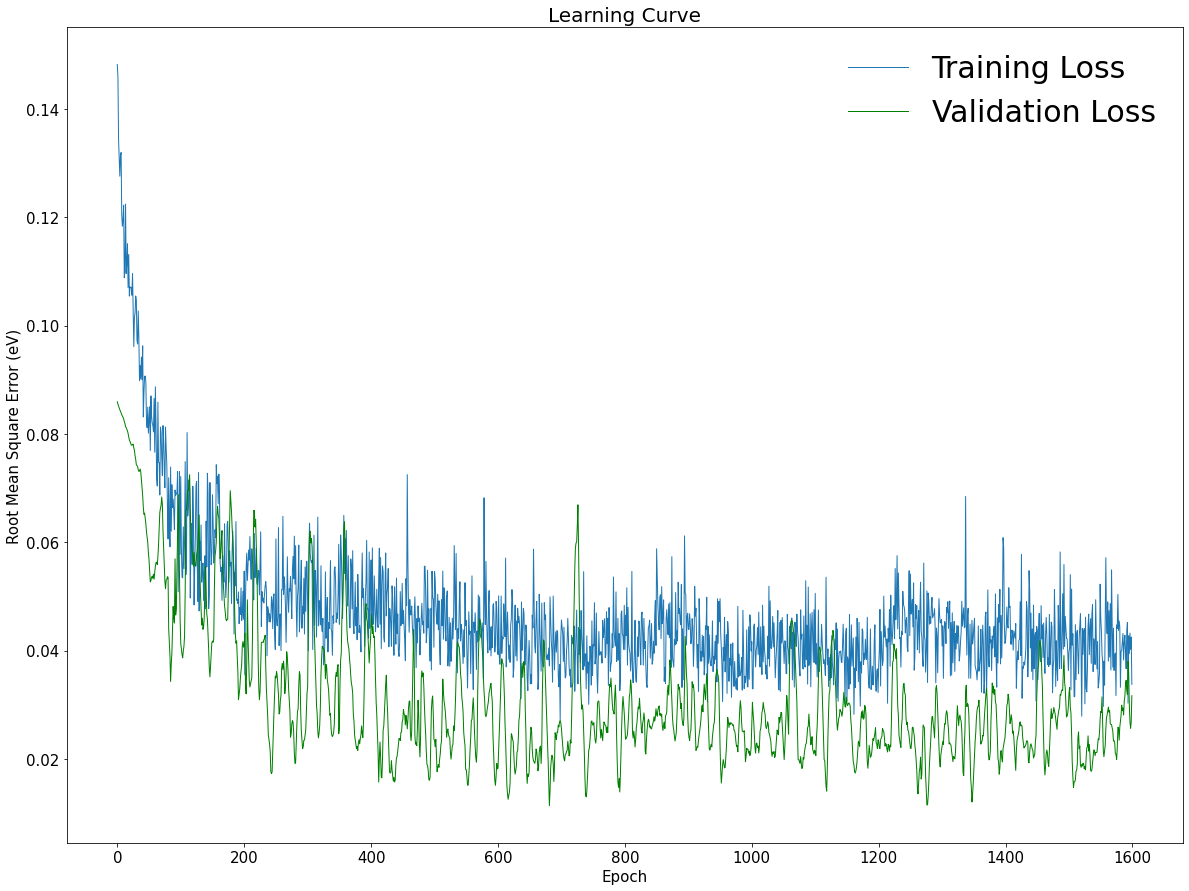

In [63]:
training_losses = model_history_rmse.history['loss']
validation_losses = model_history_rmse.history['val_loss']

plt.figure(figsize=(20, 15))
plt.plot(training_losses, label="Training Loss", linewidth = 1)
plt.plot(validation_losses, label="Validation Loss", linewidth = 1, c='g')
plt.title('Learning Curve', fontsize = 20)
plt.xlabel('Epoch', fontsize = 15)
plt.ylabel('Root Mean Square Error (eV)', fontsize = 15)
plt.legend(frameon=False, fontsize = 30);

# 6. Regressor Performance Plots

In [64]:
GBR.fit(X_train, y_train)
KNR.fit(X_train, y_train)
RFR.fit(X_train, y_train)
SR.fit(X_train, y_train)
ridge.fit(X_train, y_train)
xgbr.fit(X_train, y_train)
xgbr_optimized.fit(X_train, y_train)
light.fit(X_train, y_train)
nn = load_model('model_best_weights.h5', num_cols = len(features.columns))

In [65]:
def trendline(xd, yd, i, name, rmse, ax, order=1, c='k', alpha=1, Rval=False):
    """Make a line of best fit"""

    # Calculate trendline
    coeffs = np.polyfit(xd, yd, order)

    intercept = coeffs[-1]
    slope = coeffs[-2]
    power = coeffs[0] if order == 2 else 0

    minxd = np.min(xd)
    maxxd = np.max(xd)

    xl = np.array([minxd, maxxd])
    yl = power * xl ** 2 + slope * xl + intercept

    # Plot trendline
    if i <= 3:
        ax[0, i].plot(xl, yl, c, alpha=alpha, linestyle='--', linewidth=0.8)

    if i > 3:
        ax[1, i - 4].plot(xl, yl, c, alpha=alpha, linestyle='--', linewidth=0.8)

    # Calculate R Squared
    p = np.poly1d(coeffs)

    ybar = np.sum(yd) / len(yd)
    ssreg = np.sum((p(xd) - ybar) ** 2)
    sstot = np.sum((yd - ybar) ** 2)
    Rsqr = ssreg / sstot

    if not Rval:
        # Plot R^2 value
        if i <= 3:
            ax[0, i].text(0.085, -0.055, name, fontsize=18)
            ax[0, i].text(0.085, -0.085, '$MAE = %0.3f$' % mae, fontsize=18)
            ax[0, i].text(0.085, -0.115, '$RMSE = %0.3f$' % rmse, fontsize=18)
            ax[0, i].text(0.085, -0.145, '$R^2 = %0.3f$' % Rsqr, fontsize=18)
        if i > 3:
            ax[1, i - 4].text(0.085, -0.055, name, fontsize=18)
            ax[1, i - 4].text(0.085, -0.085, '$MAE = %0.3f$' % mae, fontsize=18)
            ax[1, i - 4].text(0.085, -0.115, '$RMSE = %0.3f$' % rmse, fontsize=18)
            ax[1, i - 4].text(0.085, -0.145, '$R^2 = %0.3f$' % Rsqr, fontsize=18)
    else:
        # Return the R^2 value:
        return Rsqr


def plot_data(train_data, test_data, i, name, rmse, mae, ax):
    if i <= 3:
        # Plot data
        ax[0, i].scatter(train_data['G_co (eV)'], train_data['prediction'], label="Training Set",
                         alpha=1, marker='o', s=25)
        ax[0, i].scatter(test_data['G_co (eV)'], test_data['prediction'], label='Testing Set',
                         alpha=1, marker='o', s=25)
        #ax[0,i].set_title(name, fontsize=15)

        # Combine data for best fit line
        x = pd.concat([train_data['G_co (eV)'], test_data['G_co (eV)']])
        y = pd.concat([train_data['prediction'], test_data['prediction']])

        # plot best fit line
        trendline(x, y, i, name, rmse, ax)

        # plot legend/axis
        ax[0, i].legend(loc='upper left', fontsize=18, frameon=False)

    if i > 3:
        # Plot data
        ax[1, i - 4].scatter(train_data['G_co (eV)'], train_data['prediction'], label="Training Set",
                             alpha=1, marker='o', s=25)
        ax[1, i - 4].scatter(test_data['G_co (eV)'], test_data['prediction'], label='Testing Set',
                             alpha=1, marker='o', s=25)
        # ax[1,i-4].set_title(name, fontsize=15)

        # Combine data to create best fit line
        x = pd.concat([train_data['G_co (eV)'], test_data['G_co (eV)']])
        y = pd.concat([train_data['prediction'], test_data['prediction']])

        # Plot best fit line
        trendline(x, y, i, name, rmse, ax)

        # Plot legend/axis
        ax[1, i - 4].legend(loc='upper left', fontsize=18, frameon=False)

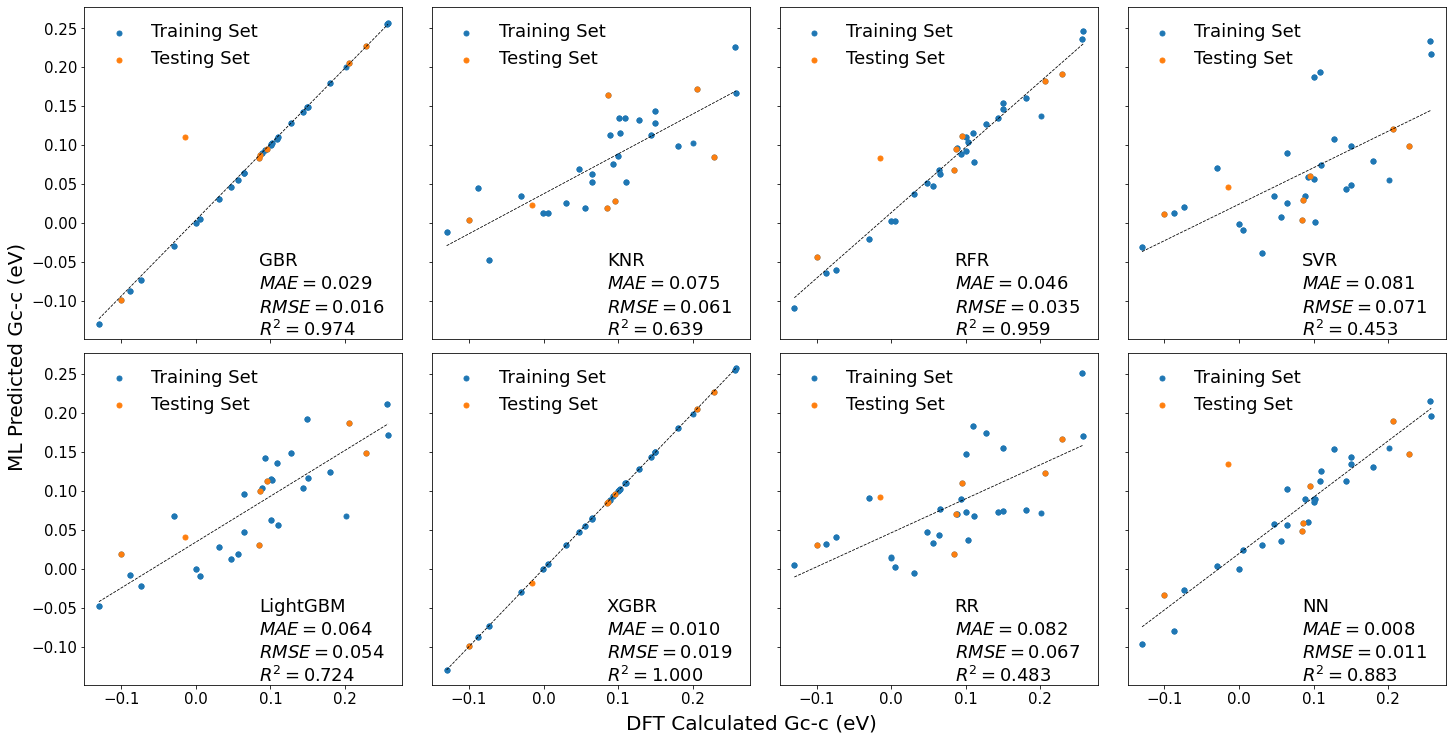

In [66]:
fig, ax = plt.subplots(nrows=2, ncols=4, sharex = True, sharey = True, figsize = (20, 10))

regressors = [GBR, KNR, RFR, SR, light, xgbr_optimized, ridge, nn]

names = {
    
    GBR: 'GBR',
    KNR: 'KNR',
    RFR: 'RFR',
    SR: 'SVR',
    light: 'LightGBM',
    xgbr_optimized: 'XGBR',
    ridge: 'RR',
    nn: 'NN'
    
}

RMSE = {
    
    GBR: results_df.iloc[-1, 0][0],
    KNR: results_df.iloc[-1, 1][0],
    RFR: results_df.iloc[-1, 2][0],
    SR: results_df.iloc[-1, 3][0],
    light: results_df.iloc[-1, 6][0],
    xgbr_optimized: optimized_xgbr_rmse,
    ridge: results_df.iloc[-1, 4][0],
    nn: nn_RMSE
    
}

MAE = {
    
    GBR: results_df.iloc[-1, 0][1],
    KNR: results_df.iloc[-1, 1][1],
    RFR: results_df.iloc[-1, 2][1],
    SR: results_df.iloc[-1, 3][1],
    light: results_df.iloc[-1, 6][1],
    xgbr_optimized: optimized_xgbr_mae,
    ridge: results_df.iloc[-1, 4][1],
    nn: nn_MAE
    
}

# Make Gco predictions on training and testing data using each regressor
for i, reg in enumerate(regressors):
    
    name = names[reg]
    rmse = RMSE[reg]
    mae = MAE[reg]
    
    
    # Predicting training data
    train_data = X_train.copy()
    train_data['G_co (eV)'] = y_train.copy()
    train_data['prediction'] = reg.predict(train_data.iloc[:, :-1])    
    
    # Predicting testing data
    test_data = X_test.copy()
    test_data['G_co (eV)'] = y_test.copy()
    test_data['prediction'] = reg.predict(test_data.iloc[:, :-1])    
    
    # Plotting the performance of each regressor
    plot_data(train_data, test_data, i, name, rmse, mae, ax)

fig.text(0.5, -0.01, 'DFT Calculated Gc-c (eV)', ha='center', va='center', fontsize = 20)
fig.text(-0.01, 0.5, 'ML Predicted Gc-c (eV)', ha='center', va='center', rotation='vertical', fontsize = 20)
fig.tight_layout(pad = 1);

# 7. XGBR Prediction on Full Dataset

In [67]:
prediction_df = pd.read_csv('CO Dimerization Full Data (with I).csv')

In [68]:
adsorbates = prediction_df[['Adsorbate 1', 'Adsorbate 2']]

In [69]:
prediction_df

,Adsorbate 1,Adsorbate 2,num of NM atoms 1,num of NM atoms 2,num of H 1,num of H 2,Atomic num 1,Atomic num 2,PE 1,PE 2,...,IE 1 add IE 2,Average EA of Adsorbates squared,Average PE of Adsorbates squared,Average Covalent Radius of Adosrbates squared,Average FIE of Adsorbates squared,Average VdW Radius squared,Average Atomic num of Adsorbates squared,Average num of Valence Electron squared,Average IE squared,G_C2O2 - Gco
0,O,O,1.0,1.0,0.0,0.0,8.0,8.0,3.44,3.44,...,27.24,2.13,11.83,0.40,185.45,2.31,64.00,36.00,185.50,-0.01526
1,O,OH,1.0,2.0,0.0,1.0,8.0,4.5,3.44,2.82,...,26.64,1.65,9.80,0.31,185.31,2.07,39.06,42.25,177.42,0.06446
2,O,N,1.0,1.0,0.0,0.0,8.0,7.0,3.44,3.04,...,28.15,0.48,10.50,0.45,198.13,2.36,56.25,30.25,198.11,NaN
3,O,NH,1.0,2.0,0.0,1.0,8.0,4.0,3.44,2.62,...,26.42,0.81,9.18,0.33,191.60,2.10,36.00,36.00,174.50,NaN
4,O,NH2,1.0,3.0,0.0,2.0,8.0,3.0,3.44,2.48,...,24.40,0.94,8.76,0.29,189.45,2.01,30.25,42.25,148.84,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,I,SH2,1.0,3.0,0.0,2.0,53.0,6.0,2.66,2.33,...,20.91,4.53,6.22,0.89,131.90,2.86,870.25,56.25,109.31,NaN
285,I,F,1.0,1.0,0.0,0.0,53.0,9.0,2.66,3.98,...,27.87,10.43,11.02,0.97,194.23,2.98,961.00,49.00,194.18,NaN
286,I,Cl,1.0,1.0,0.0,0.0,53.0,17.0,2.66,3.16,...,23.42,11.13,8.47,1.35,137.10,3.48,1225.00,49.00,137.12,NaN
287,I,Br,1.0,1.0,0.0,0.0,53.0,35.0,2.66,2.96,...,22.26,10.31,7.90,1.53,123.93,3.67,1936.00,49.00,123.88,NaN


In [70]:
# Savings the Gco column
targets = prediction_df['G_C2O2 - Gco']

In [71]:
diff = prediction_df.columns.difference(test_data.columns)

In [72]:
# Removing all columns that were deleted in feature selection to maintain the same prediction features as training
prediction_df = prediction_df.drop(prediction_df.columns.difference(test_data.columns), 1)

In [73]:
prediction_df.columns

Index(['num of Atoms', 'Average Atomic num', 'Average PE',
       'Average Covalent Radius', 'Average FIE', 'Average EA',
       'Average VdW Radius', 'Average num of Valence Electron',
       'PE 1 minus PE 2', 'Covalent Radius 1 minus Covalent Radius 2',
       'FIE 1 minus FIE 2', 'num of Valence 1 minus num of Valence 2',
       'IE 1 minus IE 2'],
      dtype='object')

In [74]:
df_v5.columns

Index(['num of Atoms', 'Average Atomic num', 'Average PE',
       'Average Covalent Radius', 'Average FIE', 'Average EA',
       'Average VdW Radius', 'Average num of Valence Electron',
       'PE 1 minus PE 2', 'Covalent Radius 1 minus Covalent Radius 2',
       'FIE 1 minus FIE 2', 'num of Valence 1 minus num of Valence 2',
       'IE 1 minus IE 2', 'G_C2O2 - Gco'],
      dtype='object')

In [75]:
def scaler(df):
    
    base = pd.read_csv('C-C Coupling Full Data.csv')
    base = base.drop(columns = ['Adsorbate 1', 'Adsorbate 2', 'G_C2O2 - Gco'])
    scales = {}
    for i in range(len(base.columns)):
        name = base.columns[i]
        minimum = min(base.iloc[:, i])
        maximum = max(base.iloc[:, i])
        scales[name] = [minimum, maximum]
    
    for i in range(len(df.columns)):
        name_1 = df.columns[i]
        if name_1 == 'G_C2O2 - Gco':
            pass
        else:
            for j, row in enumerate(df[name_1]):
                df.iloc[j, i] = (row - scales[name_1][0]) / (scales[name_1][1] - scales[name_1][0])
        
    return df


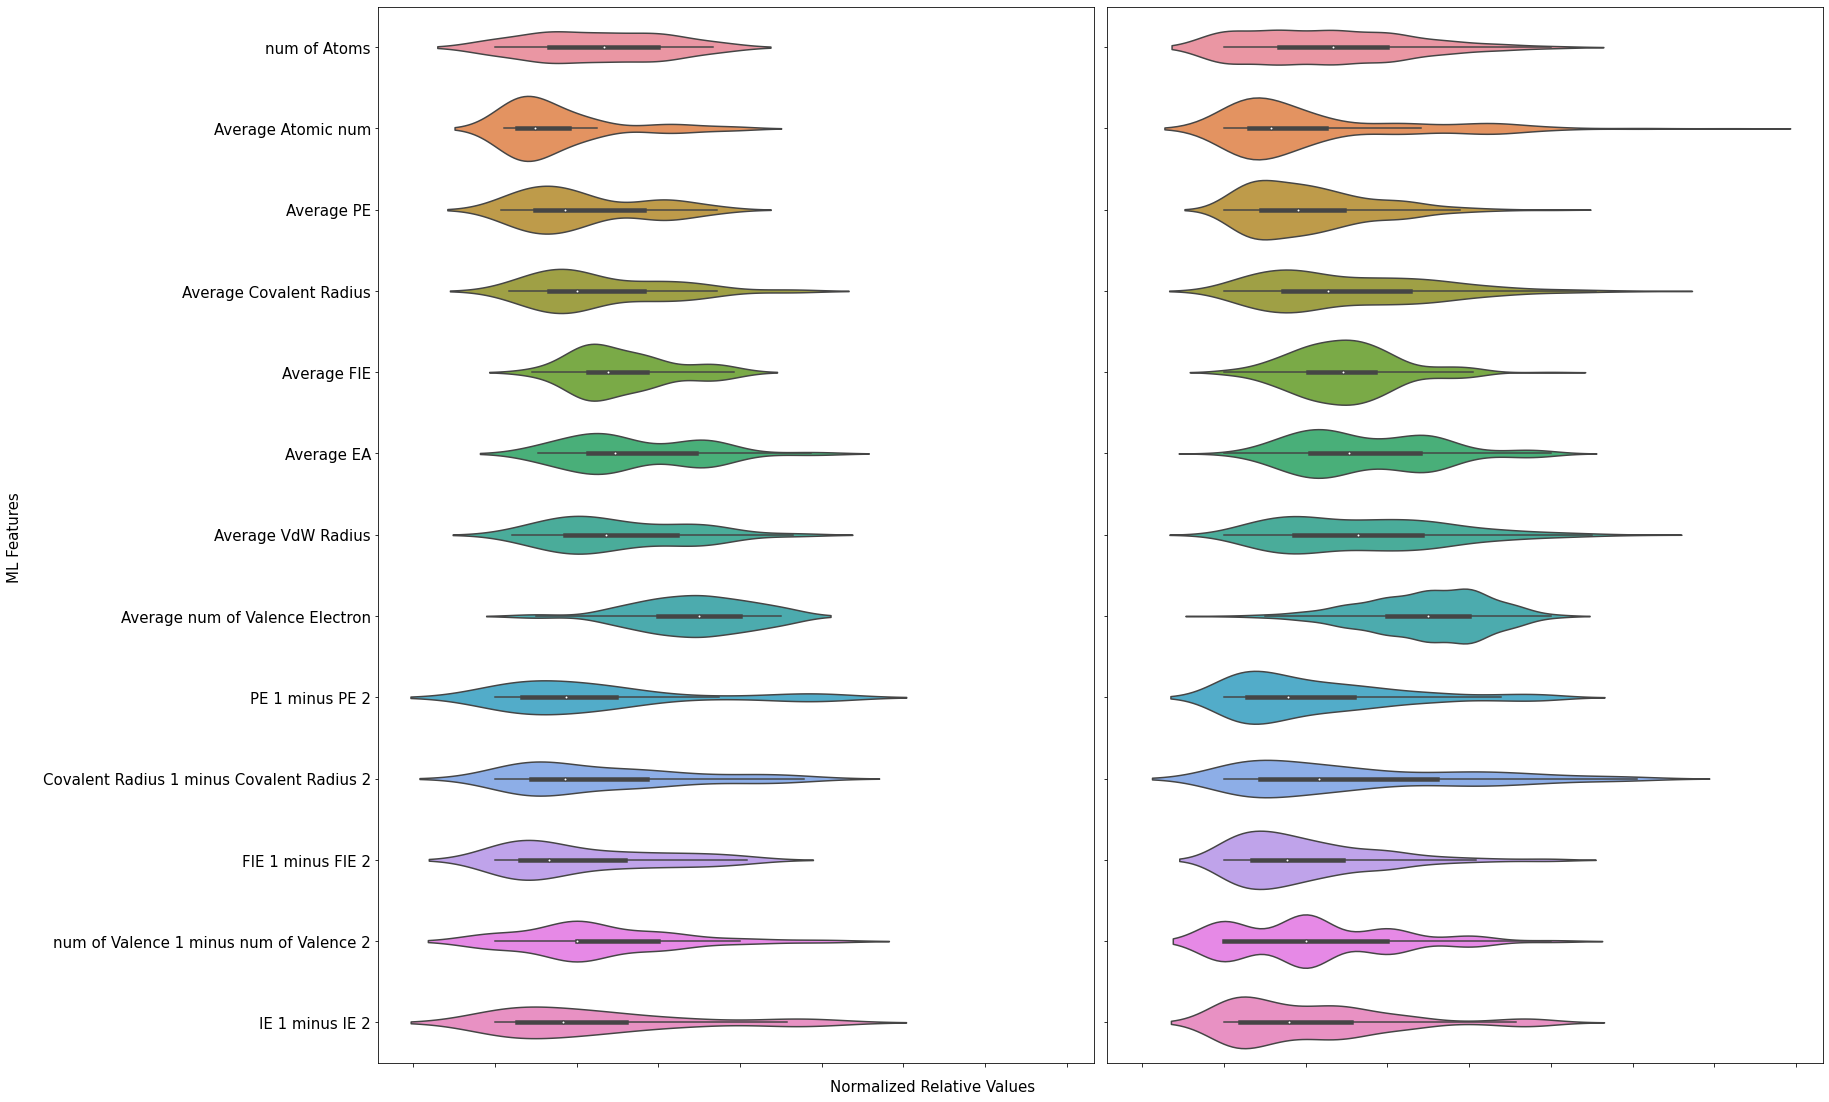

In [76]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey = True, sharex = True, figsize = (25, 15))

training_df = scaler(df_v5.copy())
training_df = training_df.iloc[:, :-1].melt(var_name='Features', value_name='Values')

full_df = scaler(prediction_df.copy())
full_df = full_df.melt(var_name='Features', value_name='Values')

sns.violinplot(x = 'Values', y = 'Features', data = training_df, ax=ax[0]).set(xticklabels=[])
sns.violinplot(x = 'Values', y = 'Features', data = full_df, ax=ax[1]).set(xticklabels=[])

ax[0].set_ylabel('')    
ax[0].set_xlabel('')
ax[1].set_ylabel('')    
ax[1].set_xlabel('')

fig.text(0.5, -0.01, 'Normalized Relative Values', ha='center', va='center', fontsize = 15)
fig.text(-0.01, 0.5, 'ML Features', ha='center', va='center', rotation='vertical', fontsize = 15)
fig.tight_layout(pad = 1);

In [77]:
'''fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, sharex = True, figsize = (25, 15))

x = list(prediction_df.columns)

training_df = scaler(df_v5.copy())
full_df = scaler(prediction_df.copy())

ax1.violinplot(training_df.iloc[:, :-1].T, vert=False)
ax2.violinplot(full_df.T, vert=False)

for ax in [ax1, ax2]:
    set_axis_style(ax, x)

fig.text(0.5, -0.01, 'ML Features', ha='center', va='center', fontsize = 20)
fig.text(-0.01, 0.5, 'Relative Values', ha='center', va='center', rotation='vertical', fontsize = 20)
fig.tight_layout(pad = 1);'''

"fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, sharex = True, figsize = (25, 15))\n\nx = list(prediction_df.columns)\n\ntraining_df = scaler(df_v5.copy())\nfull_df = scaler(prediction_df.copy())\n\nax1.violinplot(training_df.iloc[:, :-1].T, vert=False)\nax2.violinplot(full_df.T, vert=False)\n\nfor ax in [ax1, ax2]:\n    set_axis_style(ax, x)\n\nfig.text(0.5, -0.01, 'ML Features', ha='center', va='center', fontsize = 20)\nfig.text(-0.01, 0.5, 'Relative Values', ha='center', va='center', rotation='vertical', fontsize = 20)\nfig.tight_layout(pad = 1);"

In [78]:
# Adding the Gco column back
prediction_df['G_C2O2 - Gco'] = targets

In [79]:
def ml_predict(dataframe, name, reg):
    dataframe['Gc-c_ML'] = np.nan
    for i, col in enumerate(dataframe['Gc-c_ML']):
        if pd.isnull(col):
            dataframe.iloc[i, -1] = reg.predict(pd.DataFrame(dataframe.iloc[i, 0:-2]).T)

    dataframe['Gc-c_Final'] = dataframe[name]
    for i, col in enumerate(dataframe['Gc-c_Final']):
        if pd.isnull(col):
            dataframe.iloc[i, -1] = reg.predict(pd.DataFrame(dataframe.iloc[i, 0:-3]).T)

In [80]:
prediction_df

,num of Atoms,Average Atomic num,Average PE,Average Covalent Radius,Average FIE,Average EA,Average VdW Radius,Average num of Valence Electron,PE 1 minus PE 2,Covalent Radius 1 minus Covalent Radius 2,FIE 1 minus FIE 2,num of Valence 1 minus num of Valence 2,IE 1 minus IE 2,G_C2O2 - Gco
0,1.0,8.00,3.44,0.63,13.62,1.46,1.52,6.0,0.00,0.00,0.00,0.0,0.00,-0.01526
1,1.5,6.25,3.13,0.56,13.61,1.28,1.44,6.5,0.62,0.15,0.01,1.0,0.60,0.06446
2,1.0,7.50,3.24,0.67,14.08,0.70,1.54,5.5,0.40,0.08,0.92,1.0,0.91,NaN
3,1.5,6.00,3.03,0.58,13.84,0.90,1.45,6.0,0.82,0.11,0.45,0.0,0.82,NaN
4,2.0,5.50,2.96,0.54,13.76,0.97,1.42,6.5,0.96,0.18,0.29,1.0,2.84,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2.0,29.50,2.49,0.95,11.48,2.13,1.69,7.5,0.33,0.77,2.07,1.0,0.01,NaN
285,1.0,31.00,3.32,0.99,13.94,3.23,1.73,7.0,1.32,0.69,6.97,0.0,6.97,NaN
286,1.0,35.00,2.91,1.16,11.71,3.34,1.87,7.0,0.50,0.34,2.52,0.0,2.52,NaN
287,1.0,44.00,2.81,1.24,11.13,3.21,1.92,7.0,0.30,0.19,1.36,0.0,1.36,NaN


In [81]:
ml_predict(prediction_df, 'G_C2O2 - Gco' ,xgbr_optimized)

In [82]:
prediction_df

,num of Atoms,Average Atomic num,Average PE,Average Covalent Radius,Average FIE,Average EA,Average VdW Radius,Average num of Valence Electron,PE 1 minus PE 2,Covalent Radius 1 minus Covalent Radius 2,FIE 1 minus FIE 2,num of Valence 1 minus num of Valence 2,IE 1 minus IE 2,G_C2O2 - Gco,Gc-c_ML,Gc-c_Final
0,1.0,8.00,3.44,0.63,13.62,1.46,1.52,6.0,0.00,0.00,0.00,0.0,0.00,-0.01526,-0.017560,-0.015260
1,1.5,6.25,3.13,0.56,13.61,1.28,1.44,6.5,0.62,0.15,0.01,1.0,0.60,0.06446,0.064171,0.064460
2,1.0,7.50,3.24,0.67,14.08,0.70,1.54,5.5,0.40,0.08,0.92,1.0,0.91,NaN,0.004558,0.004558
3,1.5,6.00,3.03,0.58,13.84,0.90,1.45,6.0,0.82,0.11,0.45,0.0,0.82,NaN,0.056391,0.056391
4,2.0,5.50,2.96,0.54,13.76,0.97,1.42,6.5,0.96,0.18,0.29,1.0,2.84,NaN,0.090449,0.090449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2.0,29.50,2.49,0.95,11.48,2.13,1.69,7.5,0.33,0.77,2.07,1.0,0.01,NaN,0.058294,0.058294
285,1.0,31.00,3.32,0.99,13.94,3.23,1.73,7.0,1.32,0.69,6.97,0.0,6.97,NaN,0.253392,0.253392
286,1.0,35.00,2.91,1.16,11.71,3.34,1.87,7.0,0.50,0.34,2.52,0.0,2.52,NaN,0.261398,0.261398
287,1.0,44.00,2.81,1.24,11.13,3.21,1.92,7.0,0.30,0.19,1.36,0.0,1.36,NaN,0.265605,0.265605


In [83]:
b = np.sqrt(((prediction_df['G_C2O2 - Gco'] - prediction_df['Gc-c_ML'])**2).mean()).round(4)

In [84]:
print('Training RMSE: {}'.format(optimized_xgbr_rmse.round(4)))
print('Testing RMSE: {}'.format(b))

Training RMSE: 0.0186
Testing RMSE: 0.0006


In [85]:
prediction_df['Gc-c_Final'].describe()

count    289.000000
mean       0.093225
std        0.091767
min       -0.130060
25%        0.024100
50%        0.090449
75%        0.160182
max        0.277967
Name: Gc-c_Final, dtype: float64

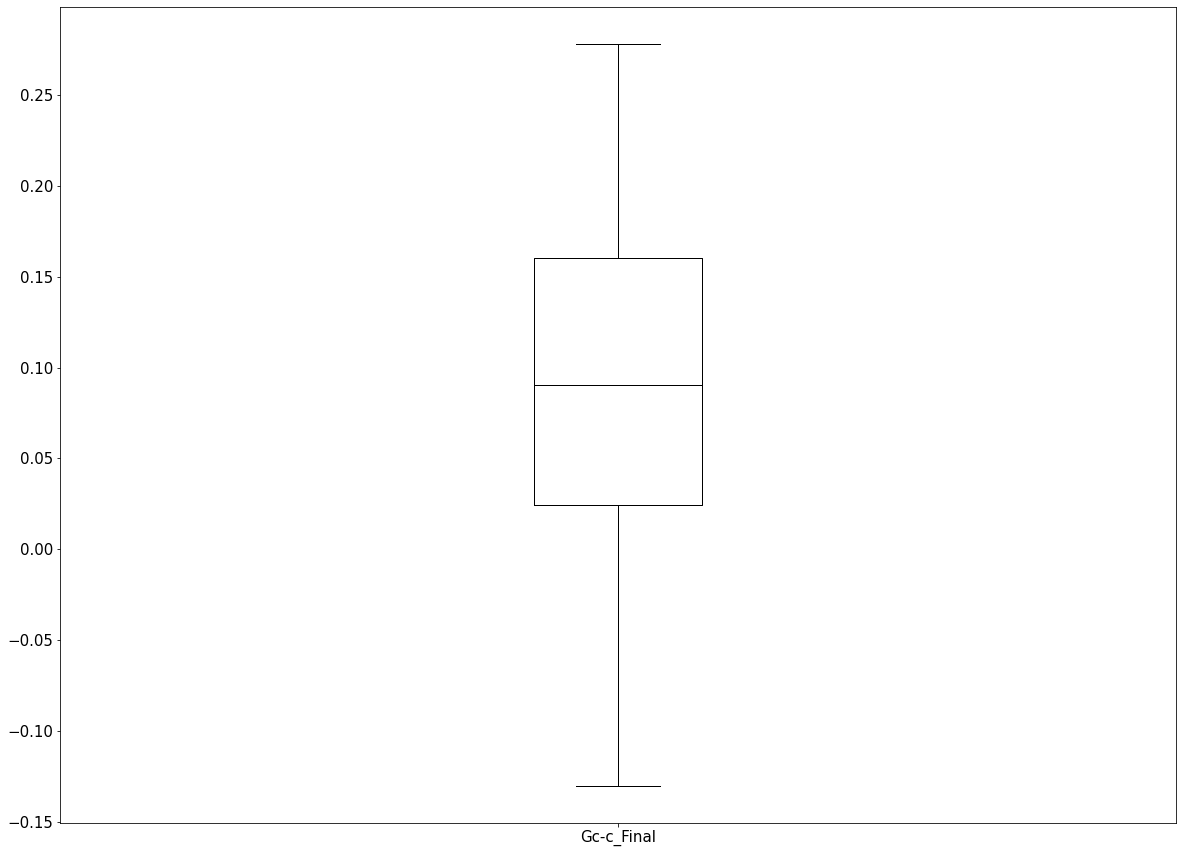

In [86]:
prediction_df.boxplot(color=dict(boxes='black', whiskers='black', medians='black', caps='black'), 
                      column='Gc-c_Final', grid=False, figsize=(20, 15));

In [87]:
final = adsorbates.join(prediction_df, how = 'left')

In [88]:
final

,Adsorbate 1,Adsorbate 2,num of Atoms,Average Atomic num,Average PE,Average Covalent Radius,Average FIE,Average EA,Average VdW Radius,Average num of Valence Electron,PE 1 minus PE 2,Covalent Radius 1 minus Covalent Radius 2,FIE 1 minus FIE 2,num of Valence 1 minus num of Valence 2,IE 1 minus IE 2,G_C2O2 - Gco,Gc-c_ML,Gc-c_Final
0,O,O,1.0,8.00,3.44,0.63,13.62,1.46,1.52,6.0,0.00,0.00,0.00,0.0,0.00,-0.01526,-0.017560,-0.015260
1,O,OH,1.5,6.25,3.13,0.56,13.61,1.28,1.44,6.5,0.62,0.15,0.01,1.0,0.60,0.06446,0.064171,0.064460
2,O,N,1.0,7.50,3.24,0.67,14.08,0.70,1.54,5.5,0.40,0.08,0.92,1.0,0.91,NaN,0.004558,0.004558
3,O,NH,1.5,6.00,3.03,0.58,13.84,0.90,1.45,6.0,0.82,0.11,0.45,0.0,0.82,NaN,0.056391,0.056391
4,O,NH2,2.0,5.50,2.96,0.54,13.76,0.97,1.42,6.5,0.96,0.18,0.29,1.0,2.84,NaN,0.090449,0.090449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,I,SH2,2.0,29.50,2.49,0.95,11.48,2.13,1.69,7.5,0.33,0.77,2.07,1.0,0.01,NaN,0.058294,0.058294
285,I,F,1.0,31.00,3.32,0.99,13.94,3.23,1.73,7.0,1.32,0.69,6.97,0.0,6.97,NaN,0.253392,0.253392
286,I,Cl,1.0,35.00,2.91,1.16,11.71,3.34,1.87,7.0,0.50,0.34,2.52,0.0,2.52,NaN,0.261398,0.261398
287,I,Br,1.0,44.00,2.81,1.24,11.13,3.21,1.92,7.0,0.30,0.19,1.36,0.0,1.36,NaN,0.265605,0.265605


In [89]:
# Save the predicted dataframe
final.to_csv('predicted_Gc-c_xgbr.csv')

# 8. delta_Gco Heat Map

In [90]:
adsorbates = final['Adsorbate 1'].unique()
binding_energy = final['Gc-c_Final']

In [91]:
binding_energy

0     -0.015260
1      0.064460
2      0.004558
3      0.056391
4      0.090449
         ...   
284    0.058294
285    0.253392
286    0.261398
287    0.265605
288    0.228545
Name: Gc-c_Final, Length: 289, dtype: float64

In [92]:
def transform_2D(series):
    result = []
    temp = []
    count = 1
    for i in series:
        if count % 18 != 0:
            temp.append(i)
            count += 1
        else:
            count = 1
            result.append(temp)
            temp = []
            temp.append(i)
            count += 1
    result.append(temp)
    return result

In [93]:
# Transform series into a 2D array
twoD = transform_2D(binding_energy)

In [94]:
twoD

[[-0.01526,
  0.06446,
  0.004558139480650425,
  0.05639111250638962,
  0.0904487892985344,
  0.08685588836669922,
  -0.04230586066842079,
  0.02365179918706417,
  0.16026736795902252,
  0.029618121683597565,
  0.1493617445230484,
  0.005487850401550531,
  0.1047057956457138,
  0.024099618196487427,
  0.14972,
  0.15984021127223969,
  0.23528674244880676],
 [0.06446,
  0.20088,
  0.06561809778213501,
  0.00047558144433423877,
  0.1577555239200592,
  -0.10022,
  0.10244,
  0.00525,
  0.048660218715667725,
  0.1686927229166031,
  0.15859724581241608,
  0.16604723036289215,
  -0.07377,
  0.09512000000000001,
  0.18169470131397247,
  0.24745360016822815,
  0.2779674828052521],
 [0.004558139480650425,
  0.06561809778213501,
  0.04055130481719971,
  0.0711325854063034,
  -0.0037174425087869167,
  -0.010405804961919785,
  -0.13005999999999998,
  0.06666982173919678,
  -0.011140411719679832,
  0.030539999999999998,
  0.14989,
  0.016298236325383186,
  0.03954869136214256,
  0.04083273187279701

In [95]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from matplotlib.colors import ListedColormap




#Plotting
trace = go.Heatmap(z = twoD,
                   x = adsorbates,
                   y = adsorbates,
                   colorscale = 'YlOrBr',
                   colorbar   = dict(title = "Delta_Gc-c",
                                     titleside = "right"
                                    )
                  )

layout = go.Layout(dict(title = "Gc-c for different adsorbate combinations",
                        autosize = False,
                        height  = 1000,
                        width   = 1000,
                        yaxis   = dict(tickfont = dict(size = 15)),
                        xaxis   = dict(tickfont = dict(size = 15))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

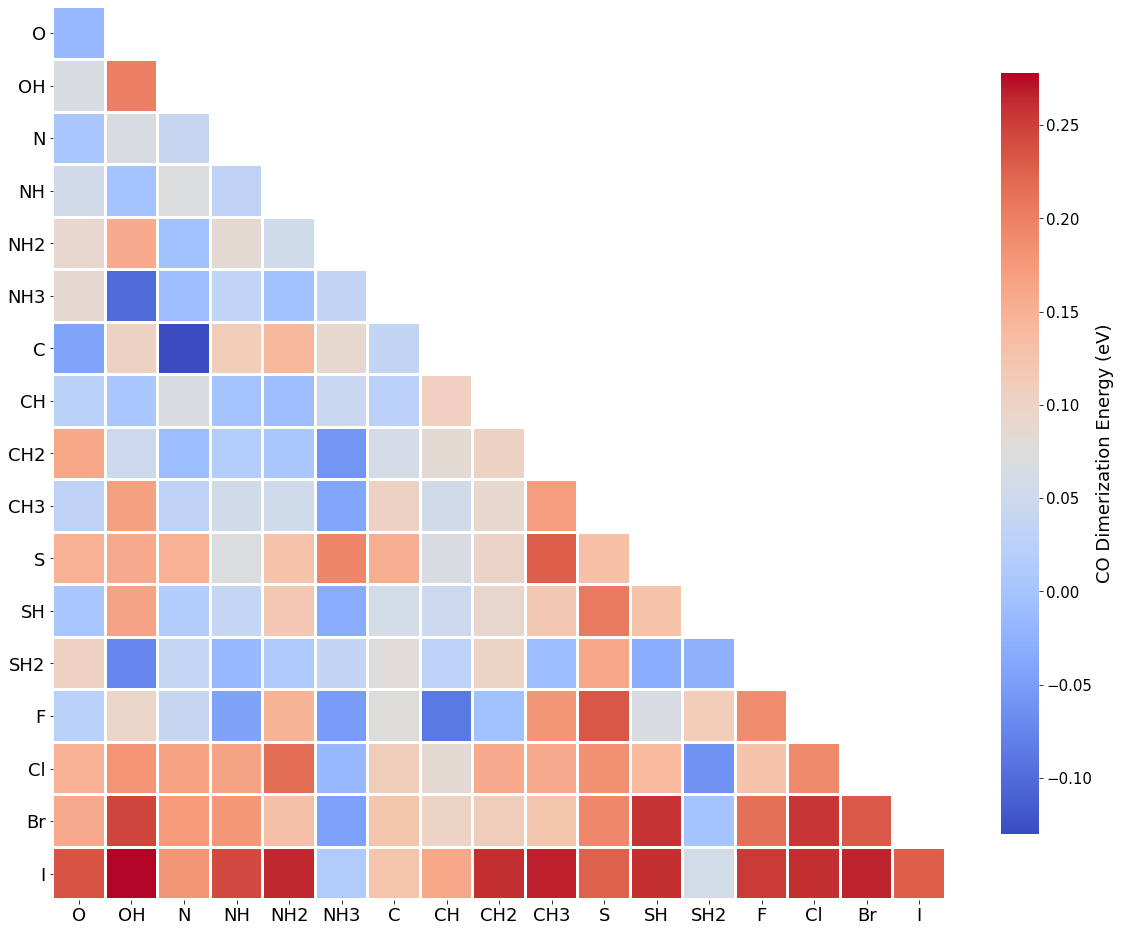

In [103]:
import matplotlib

cmap1 = matplotlib.colors.ListedColormap(['g'])
mask = np.tril(np.ones_like(twoD, dtype=bool))

ax = sns.heatmap(twoD, linewidth=2, mask = 1 - mask,
                 cmap = "coolwarm", square = True, cbar_kws={'label': 'CO Dimerization Energy (eV)', 'shrink': 0.7})
ax.figure.axes[-1].yaxis.label.set_size(18)

#ax = sns.heatmap(twoD, linewidth=2, mask = np.array(twoD) < 0.3, cmap = cmap1, square = True, cbar=False)

ax.set_xticklabels(adsorbates, rotation = 0, size = 18)
ax.set_yticklabels(adsorbates, rotation = 0, size = 18)

plt.show()